# ***FETAL HEALTH***

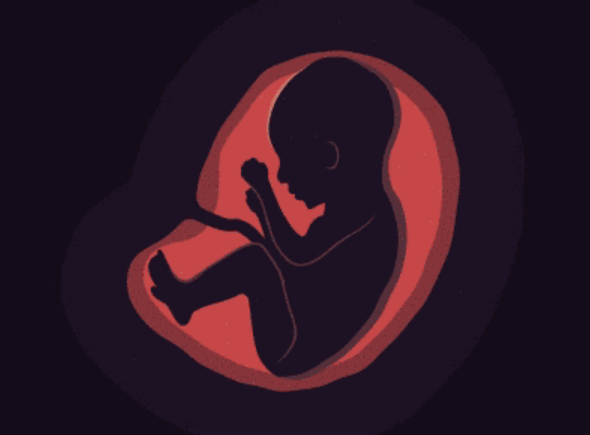

# 1. Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

# 2. Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological



In [1]:
#caricamento librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# librerie modelli predittivi
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support,roc_auc_score,classification_report, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier

In [2]:
#caricamento dataset fetal_health
df=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df['fetal_health']=df.fetal_health.astype(int)
df.iloc[:,0:22]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

# 3. EDA (EXPLORATORY DATA ANALYSIS)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

The dataset is full, there is no missing data and it is composed exclusively of float64 and int type variables.

The 'fetal_health' feature contains the classes we want to predict. In this case we are dealing with a multiclass problem:

- 1: Normal
- 2: I suspect
- 3: Pathological

In [4]:
#rinomino intestazione della colonna per migliore visualizzazione in subplot successivo
df.rename(columns={df.columns[9]:'%_time_with_abnormal_long_term_var'},inplace=True)
df.describe().T

count        mean        std    min  \
baseline value                        2126.0  133.303857   9.840844  106.0   
accelerations                         2126.0    0.003178   0.003866    0.0   
fetal_movement                        2126.0    0.009481   0.046666    0.0   
uterine_contractions                  2126.0    0.004366   0.002946    0.0   
light_decelerations                   2126.0    0.001889   0.002960    0.0   
severe_decelerations                  2126.0    0.000003   0.000057    0.0   
prolongued_decelerations              2126.0    0.000159   0.000590    0.0   
abnormal_short_term_variability       2126.0   46.990122  17.192814   12.0   
mean_value_of_short_term_variability  2126.0    1.332785   0.883241    0.2   
%_time_with_abnormal_long_term_var    2126.0    9.846660  18.396880    0.0   
mean_value_of_long_term_variability   2126.0    8.187629   5.628247    0.0   
histogram_width                       2126.0   70.445908  38.955693    3.0   
histogram_min                         2126.0   93.579492  29.560212   50.0   
histogram_max                         2126.0  164.025400  17.944183  122.0   
histogram_number_of_peaks             2126.0    4.068203   2.949386    0.0   
histogram_number_of_zeroes            2126.0    0.323612   0.706059    0.0   
histogram_mode                        2126.0  137.452023  16.381289   60.0   
histogram_mean                        2126.0  134.610536  15.593596   73.0   
histogram_median                      2126.0  138.090310  14.466589   77.0   
histogram_variance                    2126.0   18.808090  28.977636    0.0   
histogram_tendency                    2126.0    0.320320   0.610829   -1.0   
fetal_health                          2126.0    1.304327   0.614377    1.0   

                                          25%      50%      75%      max  
baseline value                        126.000  133.000  140.000  160.000  
accelerations                           0.000    0.002    0.006    0.019  
fetal_movement                          0.000    0.000    0.003    0.481  
uterine_contractions                    0.002    0.004    0.007    0.015  
light_decelerations                     0.000    0.000    0.003    0.015  
severe_decelerations                    0.000    0.000    0.000    0.001  
prolongued_decelerations                0.000    0.000    0.000    0.005  
abnormal_short_term_variability        32.000   49.000   61.000   87.000  
mean_value_of_short_term_variability    0.700    1.200    1.700    7.000  
%_time_with_abnormal_long_term_var      0.000    0.000   11.000   91.000  
mean_value_of_long_term_variability     4.600    7.400   10.800   50.700  
histogram_width                        37.000   67.500  100.000  180.000  
histogram_min                          67.000   93.000  120.000  159.000  
histogram_max                         152.000  162.000  174.000  238.000  
histogram_number_of_peaks               2.000    3.000    6.000   18.000  
histogram_number_of_zeroes              0.000    0.000    0.000   10.000  
histogram_mode                        129.000  139.000  148.000  187.000  
histogram_mean                        125.000  136.000  145.000  182.000  
histogram_median                      129.000  139.000  148.000  186.000  
histogram_variance                      2.000    7.000   24.000  269.000  
histogram_tendency                      0.000    0.000    1.000    1.000  
fetal_health                            1.000    1.000    1.000    3.000

In [6]:
#separe le feature dal target fetal health
df_target=df['fetal_health']
df_feature=df.drop('fetal_health',axis=1)

## 3.1 Class Distribution

Text(0.5, 1.0, 'Distribuzione delle classi')

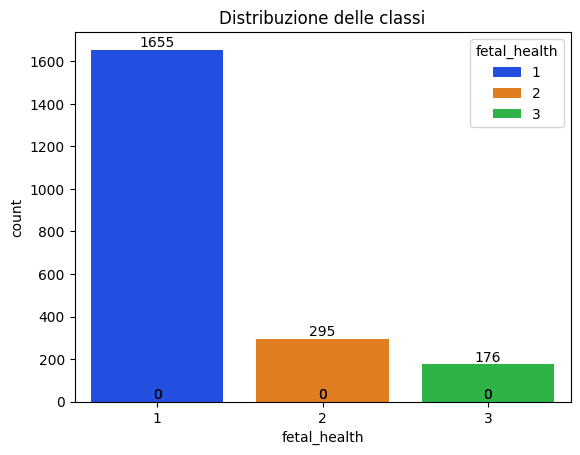

In [44]:
#sns.histplot(df,x='fetal_health',hue='fetal_health',bins=10,palette='bright')
#plt.title('Distribuzione delle classi')

g0=sns.countplot(df,x='fetal_health',hue='fetal_health',palette='bright',dodge=False)
g0.bar_label(g0.containers[0]);
g0.bar_label(g0.containers[1]);
g0.bar_label(g0.containers[2]);
plt.title('Distribuzione delle classi')

The classes are unbalanced. This can be a problem for the calculation of our predictive model.

The model could learn to perform much better class 1, which is more numerous, than the others. The strategy to proceed could be to try to balance the data and to verify the benefits. This will be done later in the notebook (chap. 4.2)

## 3.2 Features plot

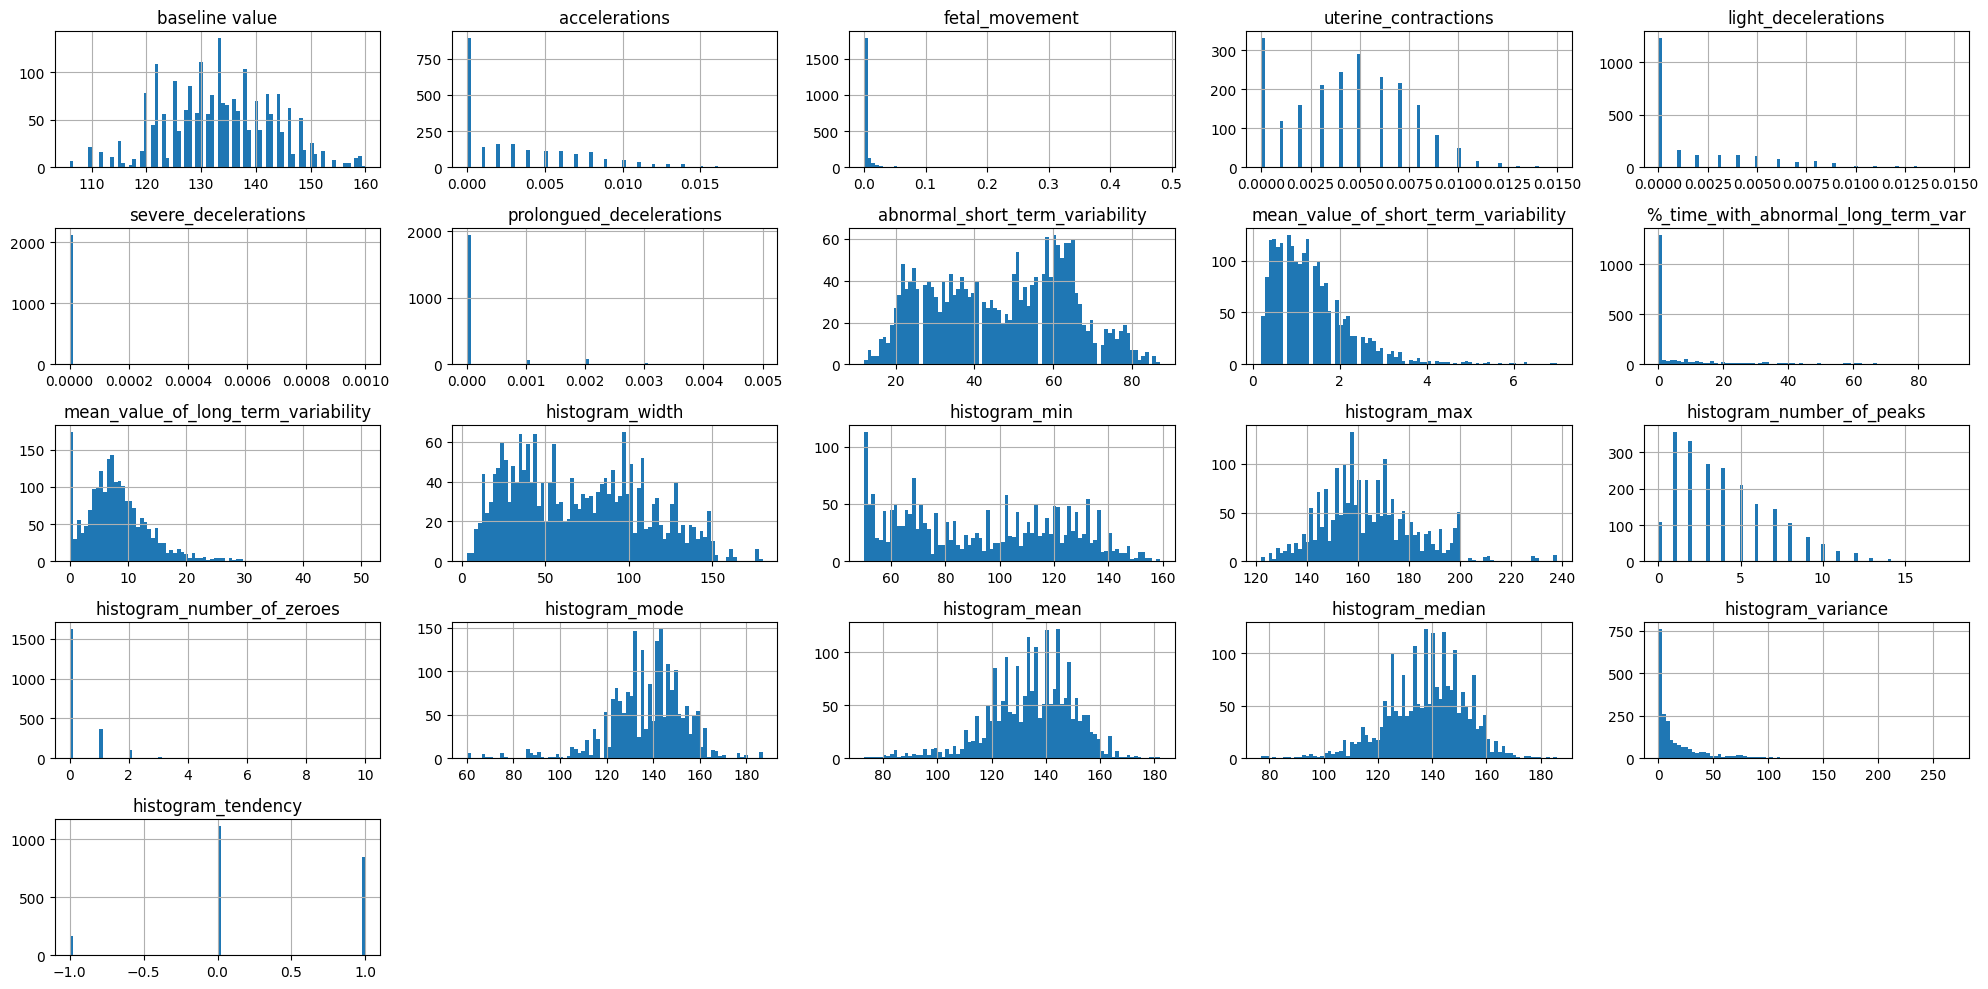

In [8]:
fig,axs=plt.subplots(5,5,figsize=(20,10))
axs=axs.ravel()
for i, col in enumerate(df_feature.columns):
    axs[i].hist(df_feature[col],bins=80)
    axs[i].set_title(col)
    axs[i].grid()
plt.tight_layout()
for i in range(21,25):
    fig.delaxes(axs.flatten()[i])


## 3.3 Avarage Values of the features per class ##

An average representation of the features divided by classes could help to better understand the problem at an early stage.

In [9]:
#hue_order = [3, 2, 1]
df_mean=pd.pivot_table(df,index=df['fetal_health'].astype(int),aggfunc='mean',sort=True)[df.columns.drop('fetal_health')]
df_mean.T

fetal_health                                     1           2           3
baseline value                        1.319819e+02  141.684746  131.687500
accelerations                         3.992145e-03    0.000275    0.000392
fetal_movement                        7.963142e-03    0.008332    0.025676
uterine_contractions                  4.780665e-03    0.002390    0.003784
light_decelerations                   1.941390e-03    0.000536    0.003670
severe_decelerations                  6.042296e-07    0.000000    0.000034
prolongued_decelerations              5.135952e-05    0.000095    0.001273
abnormal_short_term_variability       4.246586e+01   61.901695   64.539773
mean_value_of_short_term_variability  1.430634e+00    0.638983    1.575568
%_time_with_abnormal_long_term_var    5.044713e+00   29.030508   22.846591
mean_value_of_long_term_variability   8.705498e+00    8.026102    3.588636
histogram_width                       7.340000e+01   49.159322   78.346591
histogram_min                         9.108580e+01  113.294915   83.982955
histogram_max                         1.644858e+02  162.454237  162.329545
histogram_number_of_peaks             4.163142e+00    3.311864    4.443182
histogram_number_of_zeroes            3.353474e-01    0.244068    0.346591
histogram_mode                        1.382586e+02  146.555932  114.607955
histogram_mean                        1.351021e+02  144.759322  112.977273
histogram_median                      1.384598e+02  147.071186  119.562500
histogram_variance                    1.747976e+01    7.213559   50.732955
histogram_tendency                    3.419940e-01    0.433898   -0.073864

In [10]:
col1=['baseline value', 'abnormal_short_term_variability','%_time_with_abnormal_long_term_var','mean_value_of_long_term_variability','histogram_width','histogram_min', 'histogram_max',  'histogram_mode', 'histogram_mean','histogram_median','histogram_variance']
col2=['mean_value_of_short_term_variability','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_tendency']
col3=['fetal_movement','uterine_contractions','light_decelerations']
col4=['accelerations','prolongued_decelerations']
col5=['severe_decelerations']

<Figure size 640x480 with 0 Axes>

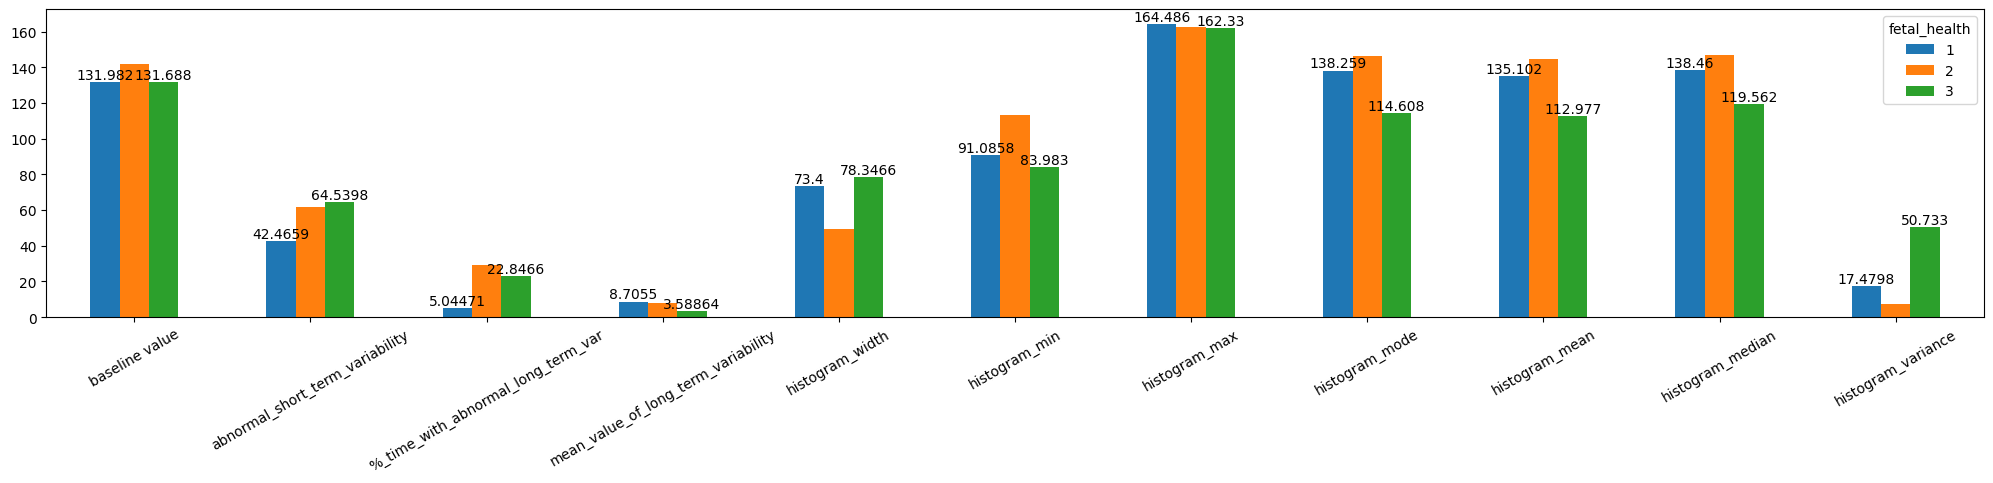

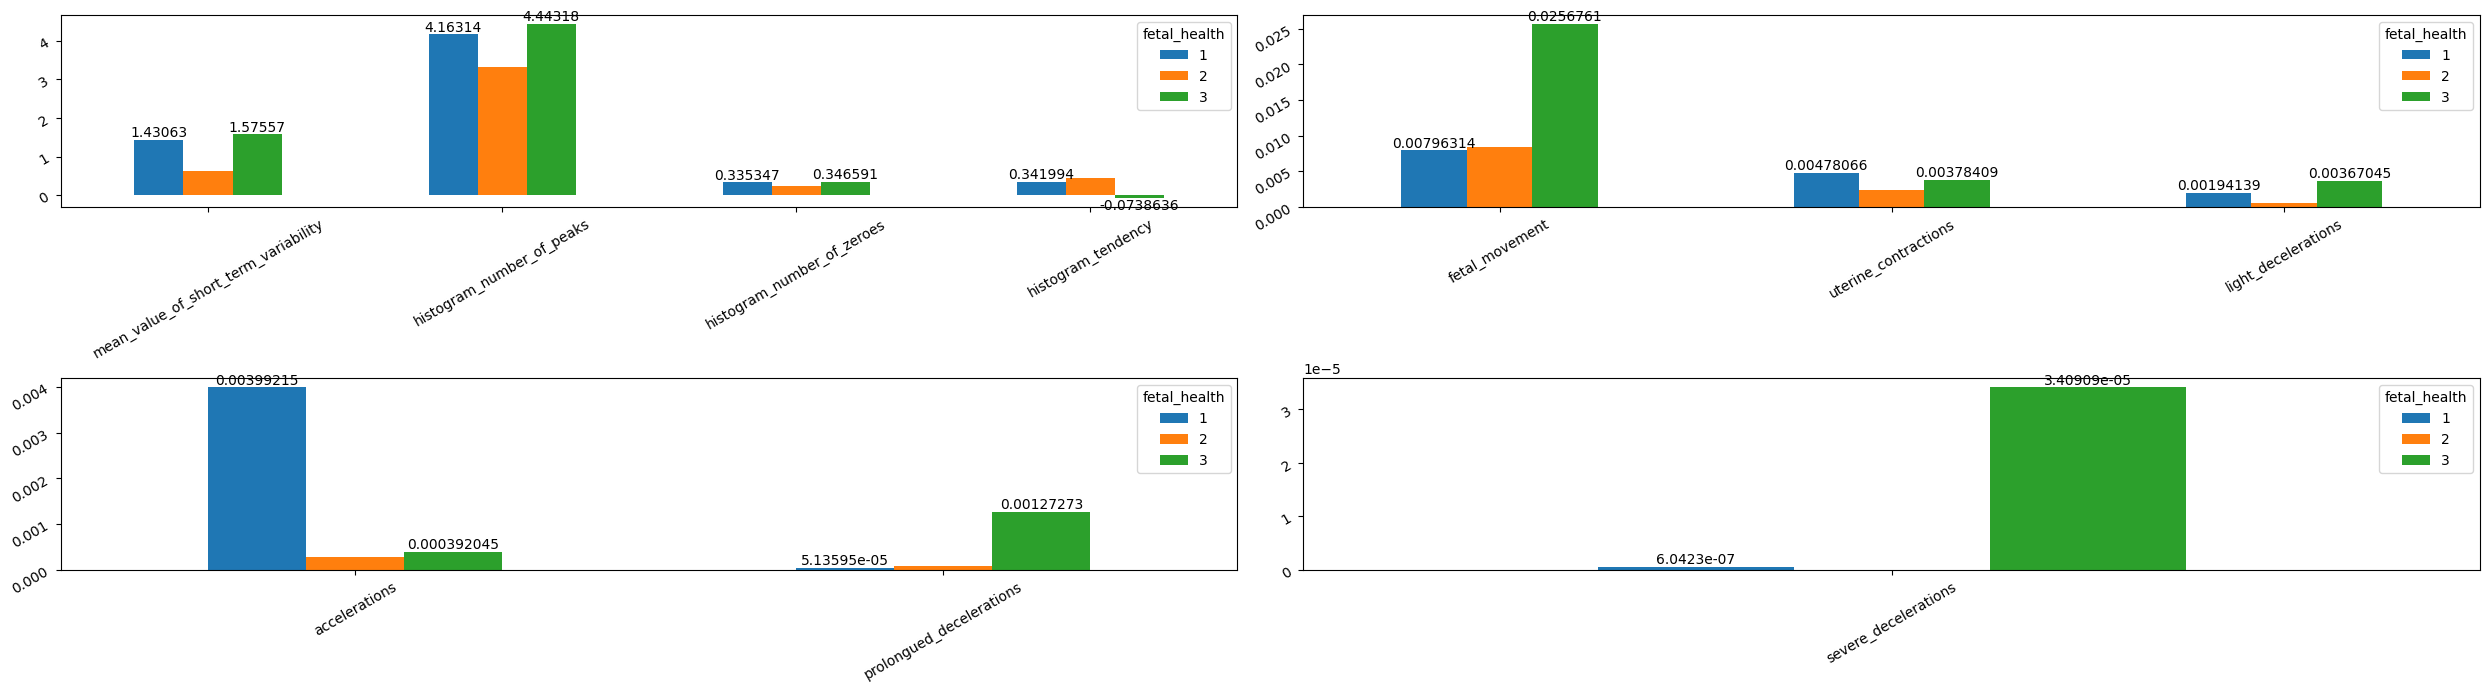

In [11]:
plt.figure()
g=df_mean[col1].T.plot(kind='bar',figsize=(25,4))
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
plt.xticks(rotation = 30)

fig,ax=plt.subplots(2,2,figsize=(25,7))
ax=ax.ravel()
g0=df_mean[col2].T.plot(kind='bar',ax=ax[0])
ax[0].tick_params(labelrotation=30)
ax[0].bar_label(ax[0].containers[0],label_type='edge')
ax[0].bar_label(ax[0].containers[2],label_type='edge')
g1=df_mean[col3].T.plot(kind='bar',ax=ax[1])
ax[1].tick_params(labelrotation=30)
ax[1].bar_label(ax[1].containers[0],label_type='edge')
ax[1].bar_label(ax[1].containers[2],label_type='edge')
g2=df_mean[col4].T.plot(kind='bar',ax=ax[2])
ax[2].tick_params(labelrotation=30)
ax[2].bar_label(ax[2].containers[0],label_type='edge')
ax[2].bar_label(ax[2].containers[2],label_type='edge')
g3=df_mean[col5].T.plot(kind='bar',ax=ax[3])
ax[3].tick_params(labelrotation=30)
ax[3].bar_label(ax[3].containers[0],label_type='edge')
ax[3].bar_label(ax[3].containers[2],label_type='edge')
plt.tight_layout()


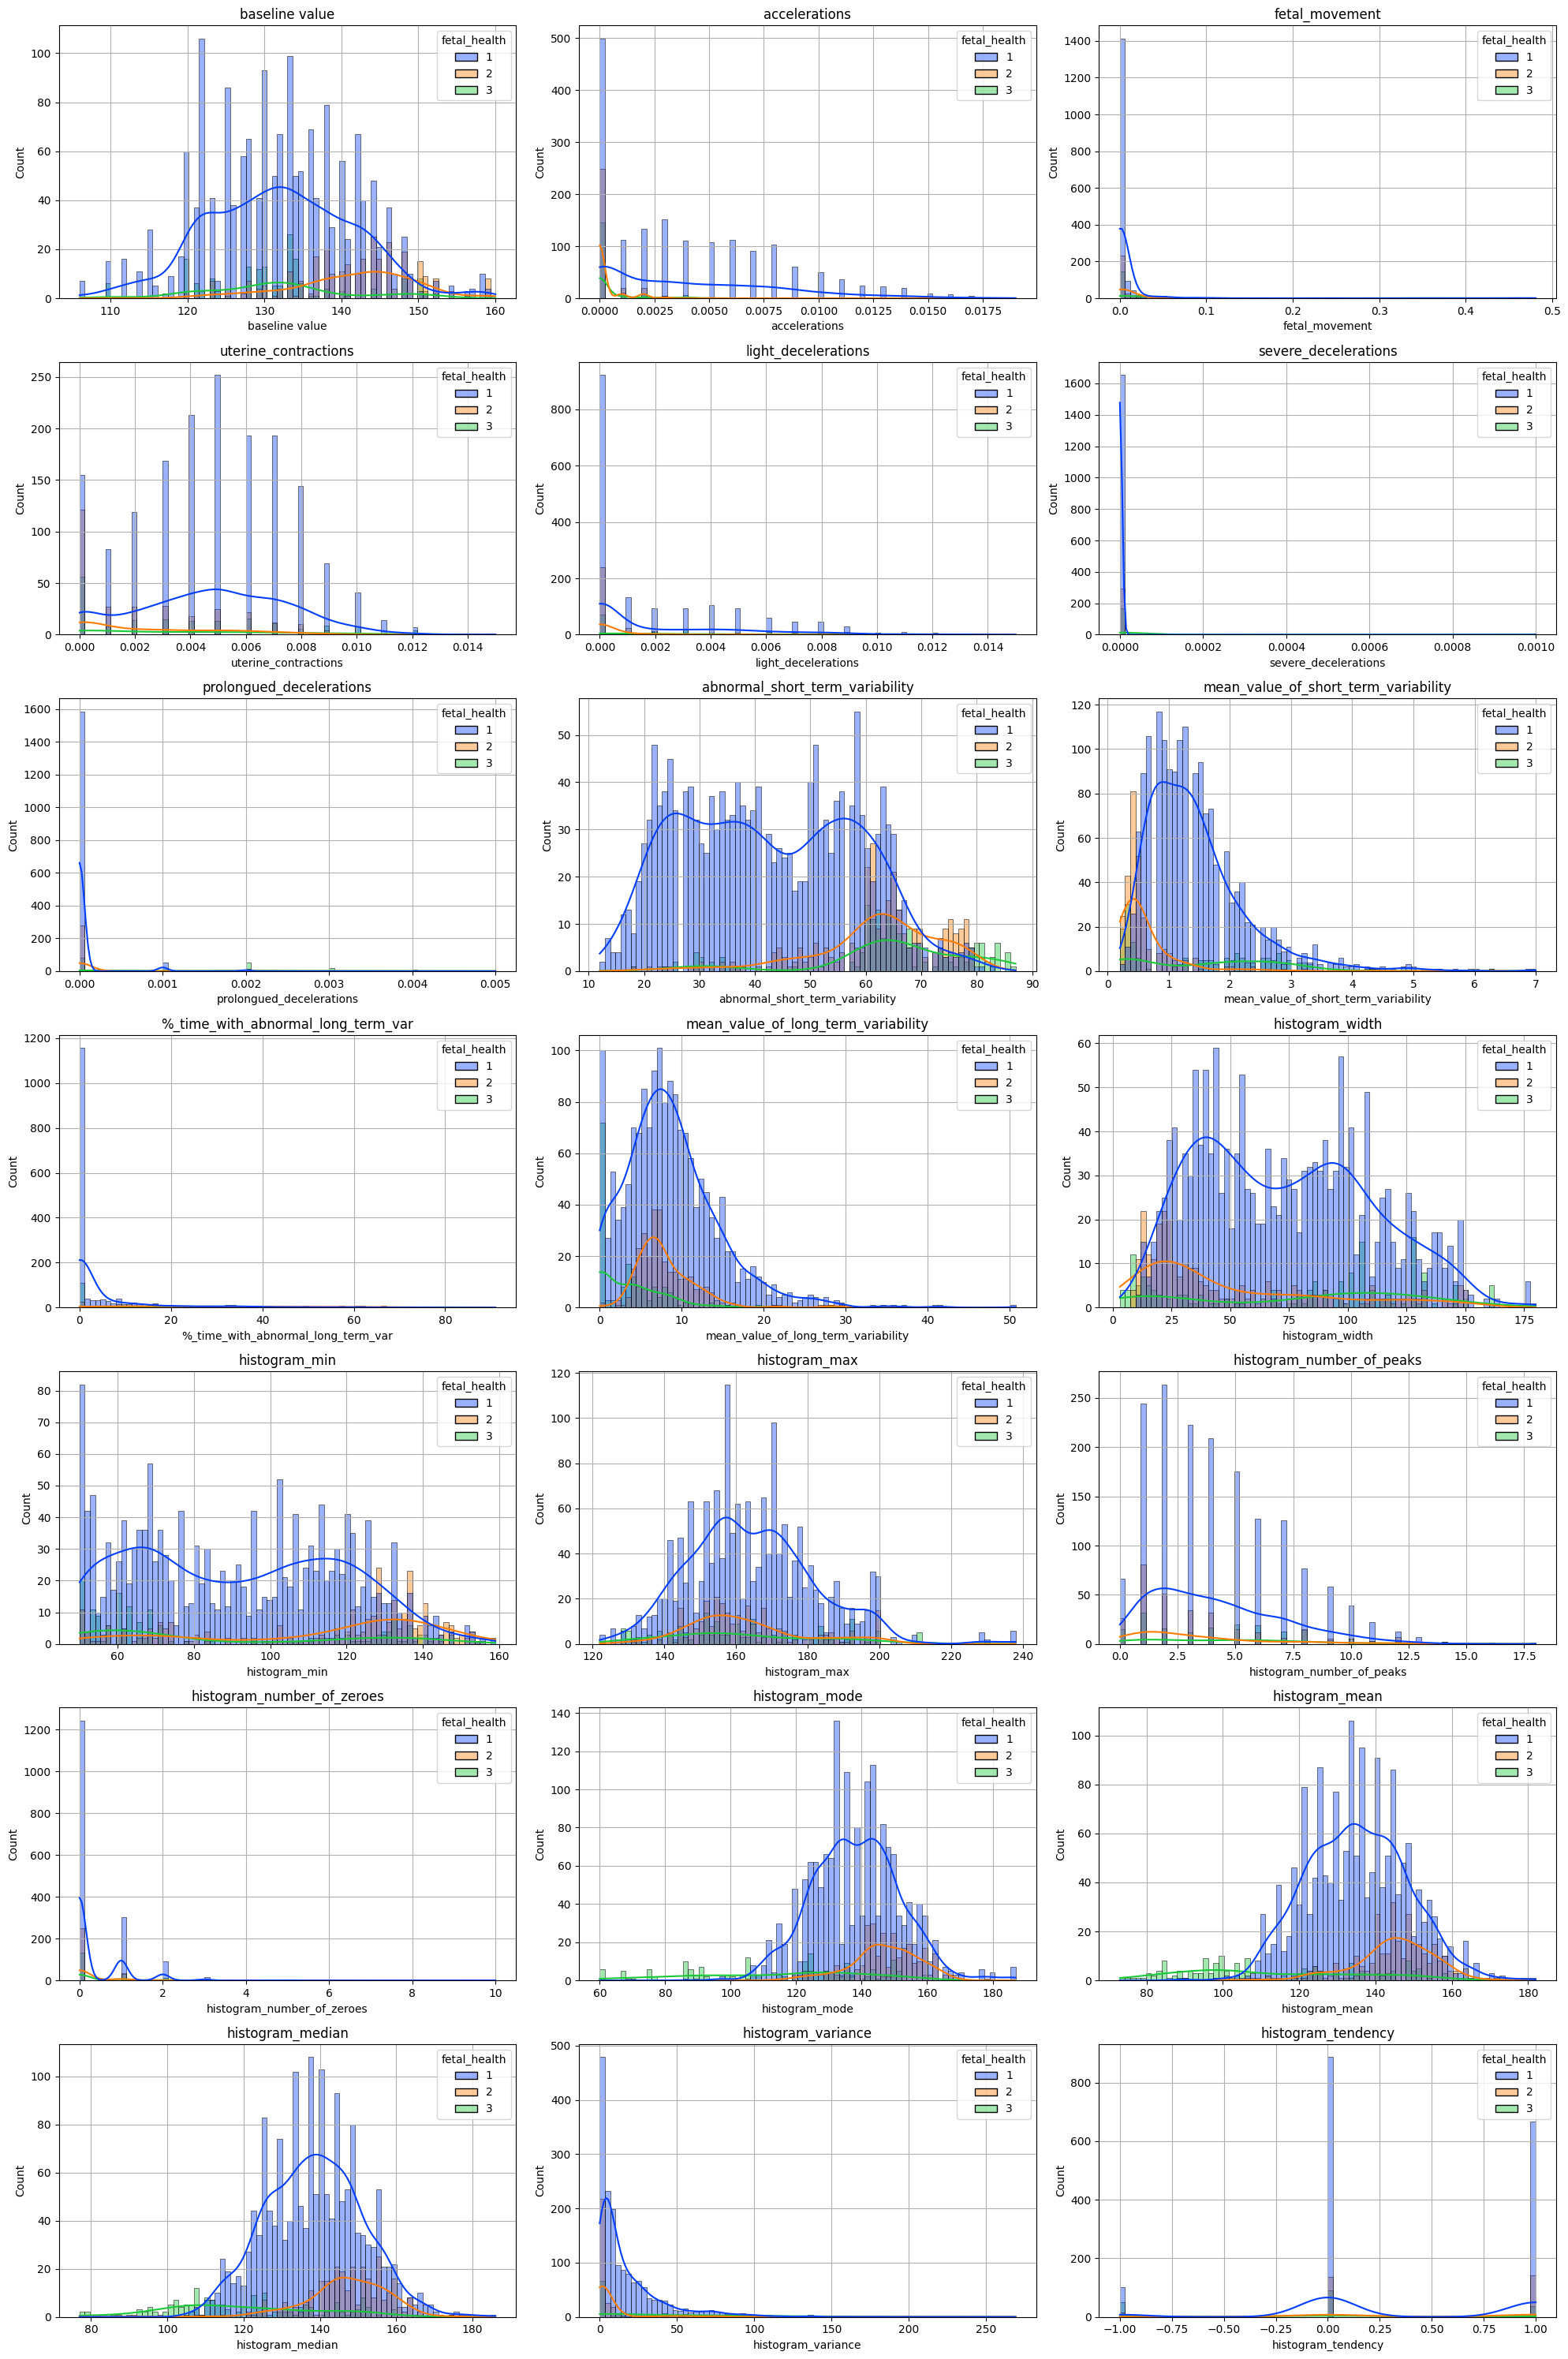

In [12]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(df_feature.columns):
    sns.histplot(df,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright',alpha=0.4)
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()

In this case **abnormal_short_term_variability** shows us better how average values ​​for example close to **60** could be attributed at the same time to <span style="color:green">***pathological*** </span >,to <span style="color:orange">***suspects***</span>, and to <span style="color:blue">***normal***</span>. On the contrary, it can be seen that in this neighborhood the occurrence of normals is higher than pathologicals and suspects, while it could be said that if the expected value were **40** then this would be classified with more probability as <span style=" color:blue">***normal*** </span>, because it is more distant and separated from the higher frequency field of the other classes. This ambiguity could also be due to the fact that the classes are not well balanced

The same result can be observed in terms of density in the graphs below:

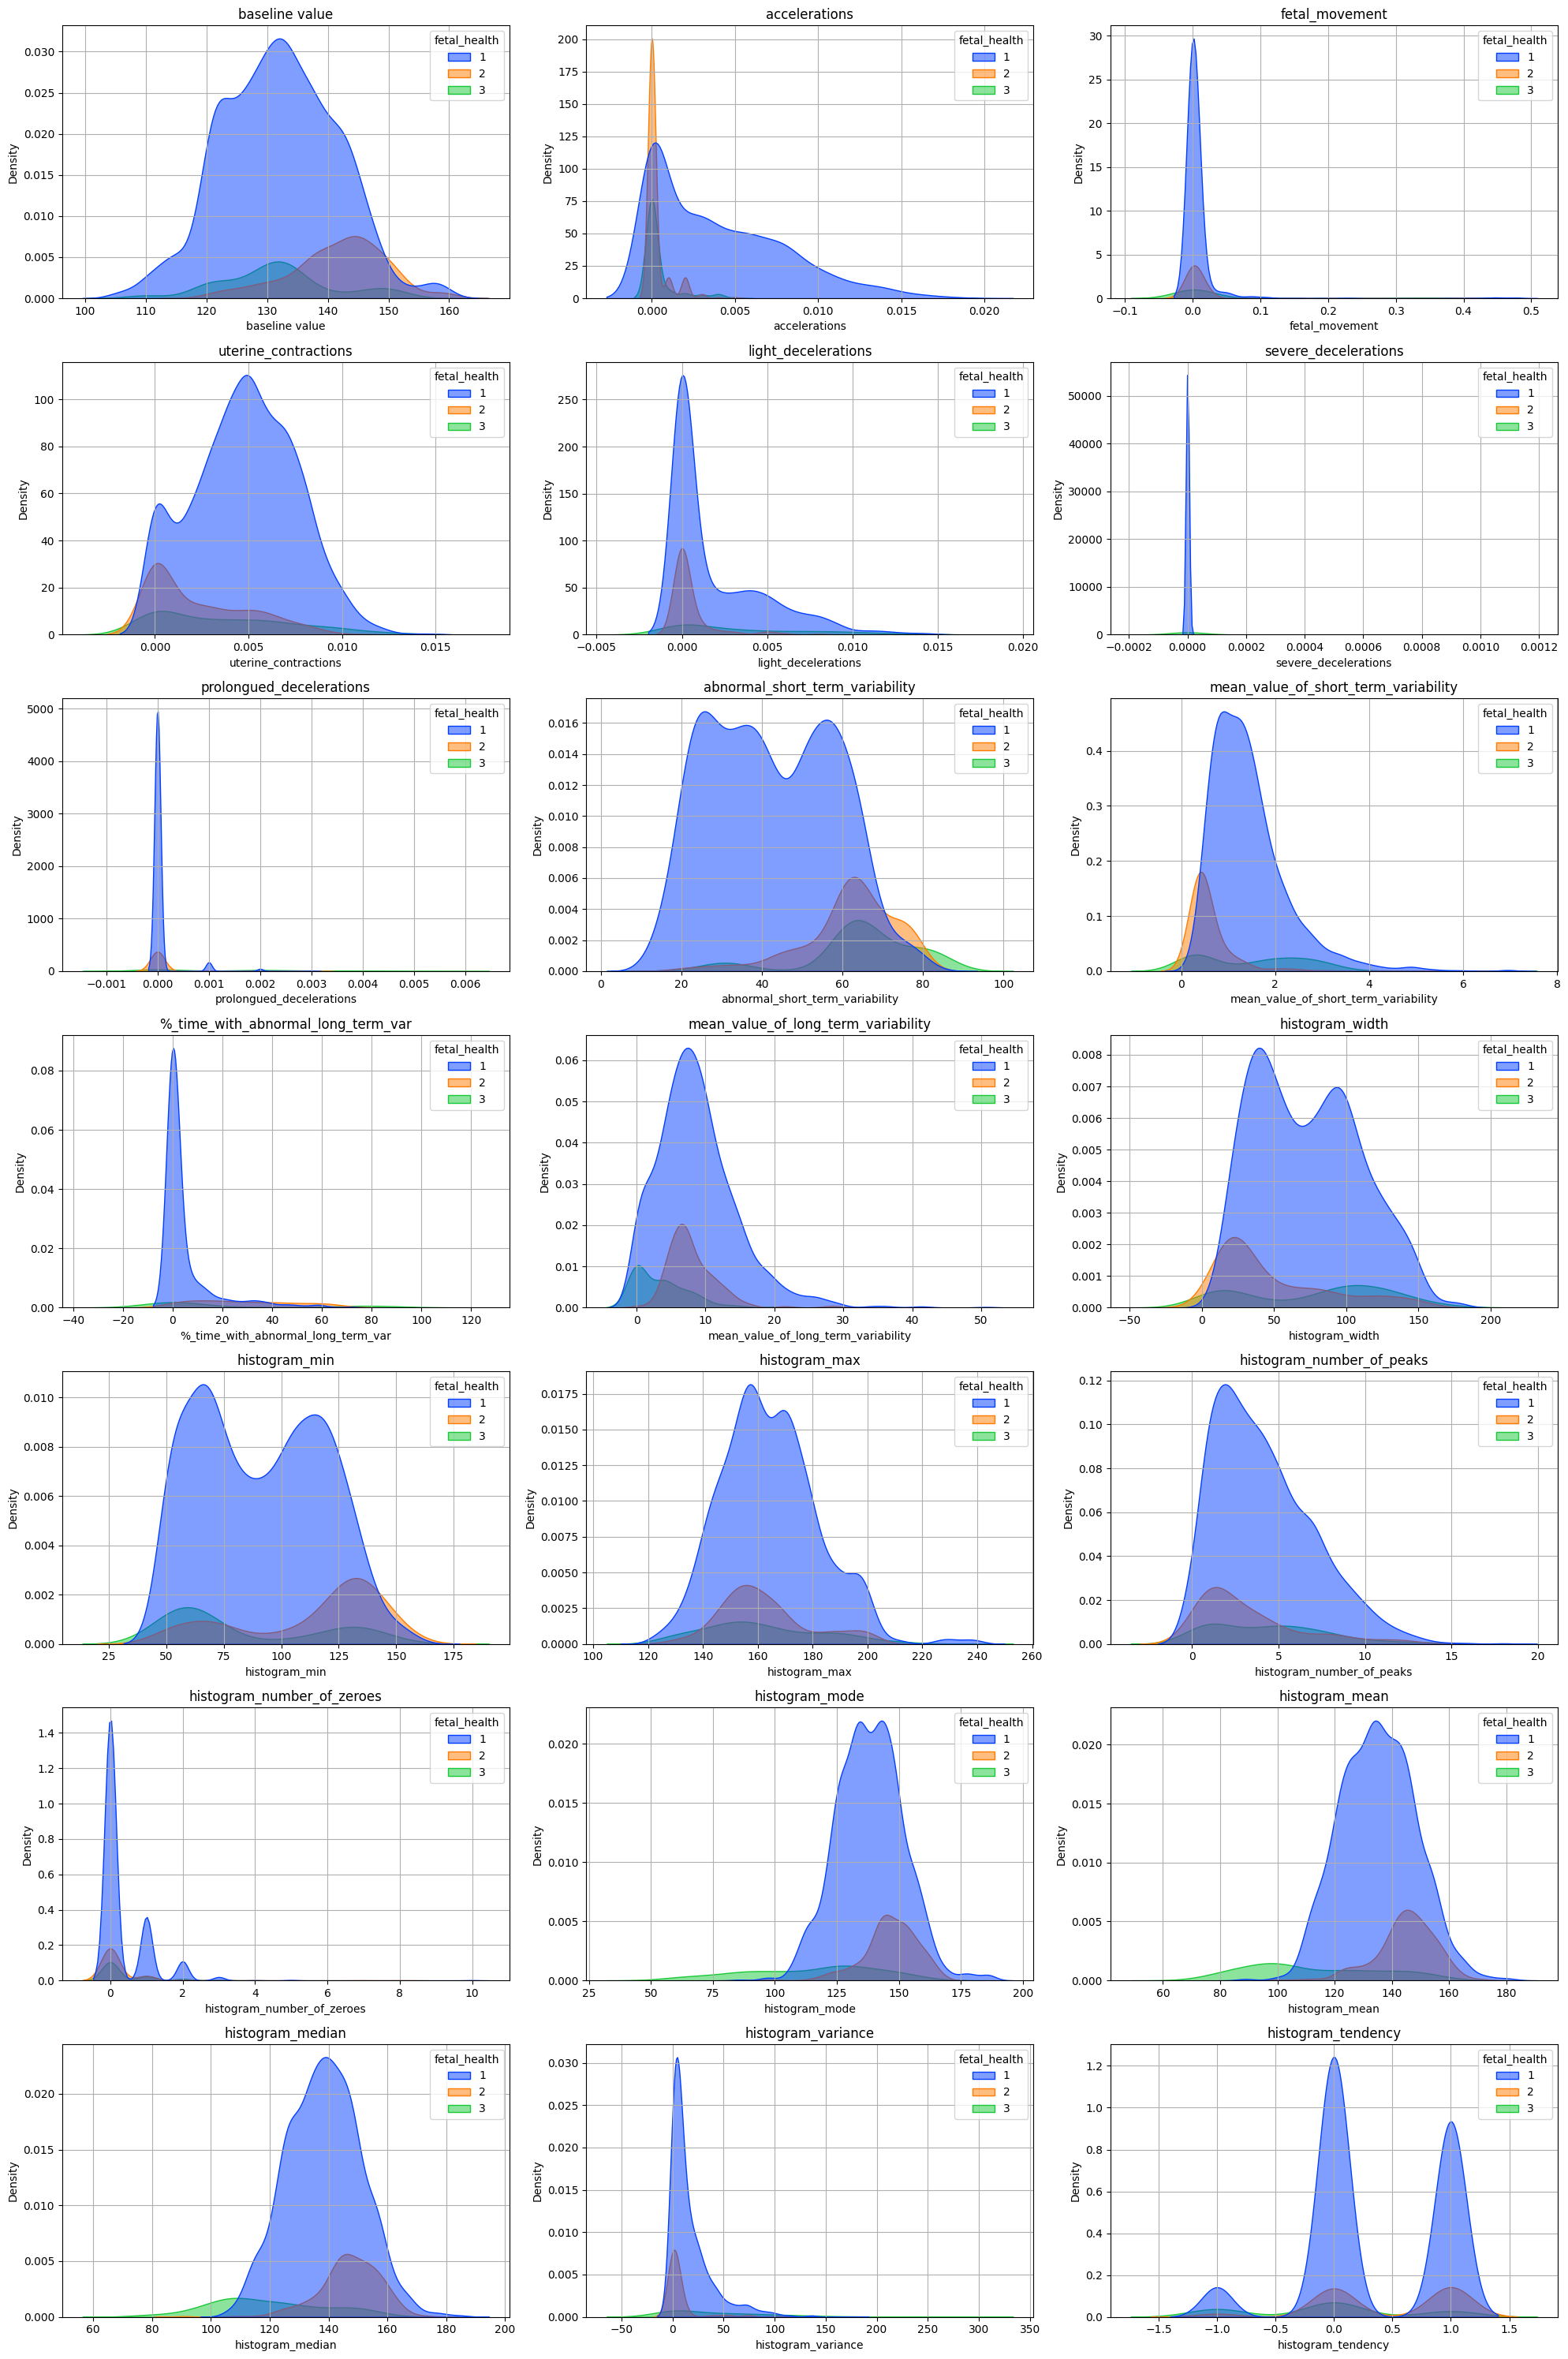

In [13]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, feature in enumerate(df_feature.columns):
    sns.kdeplot(df,x=feature,hue='fetal_health',ax=ax[i],palette='bright',fill=True,alpha=0.5,warn_singular=False)
    ax[i].set_title(feature)
    ax[i].grid()
plt.tight_layout()

## 3.4 Outliers

<AxesSubplot: >

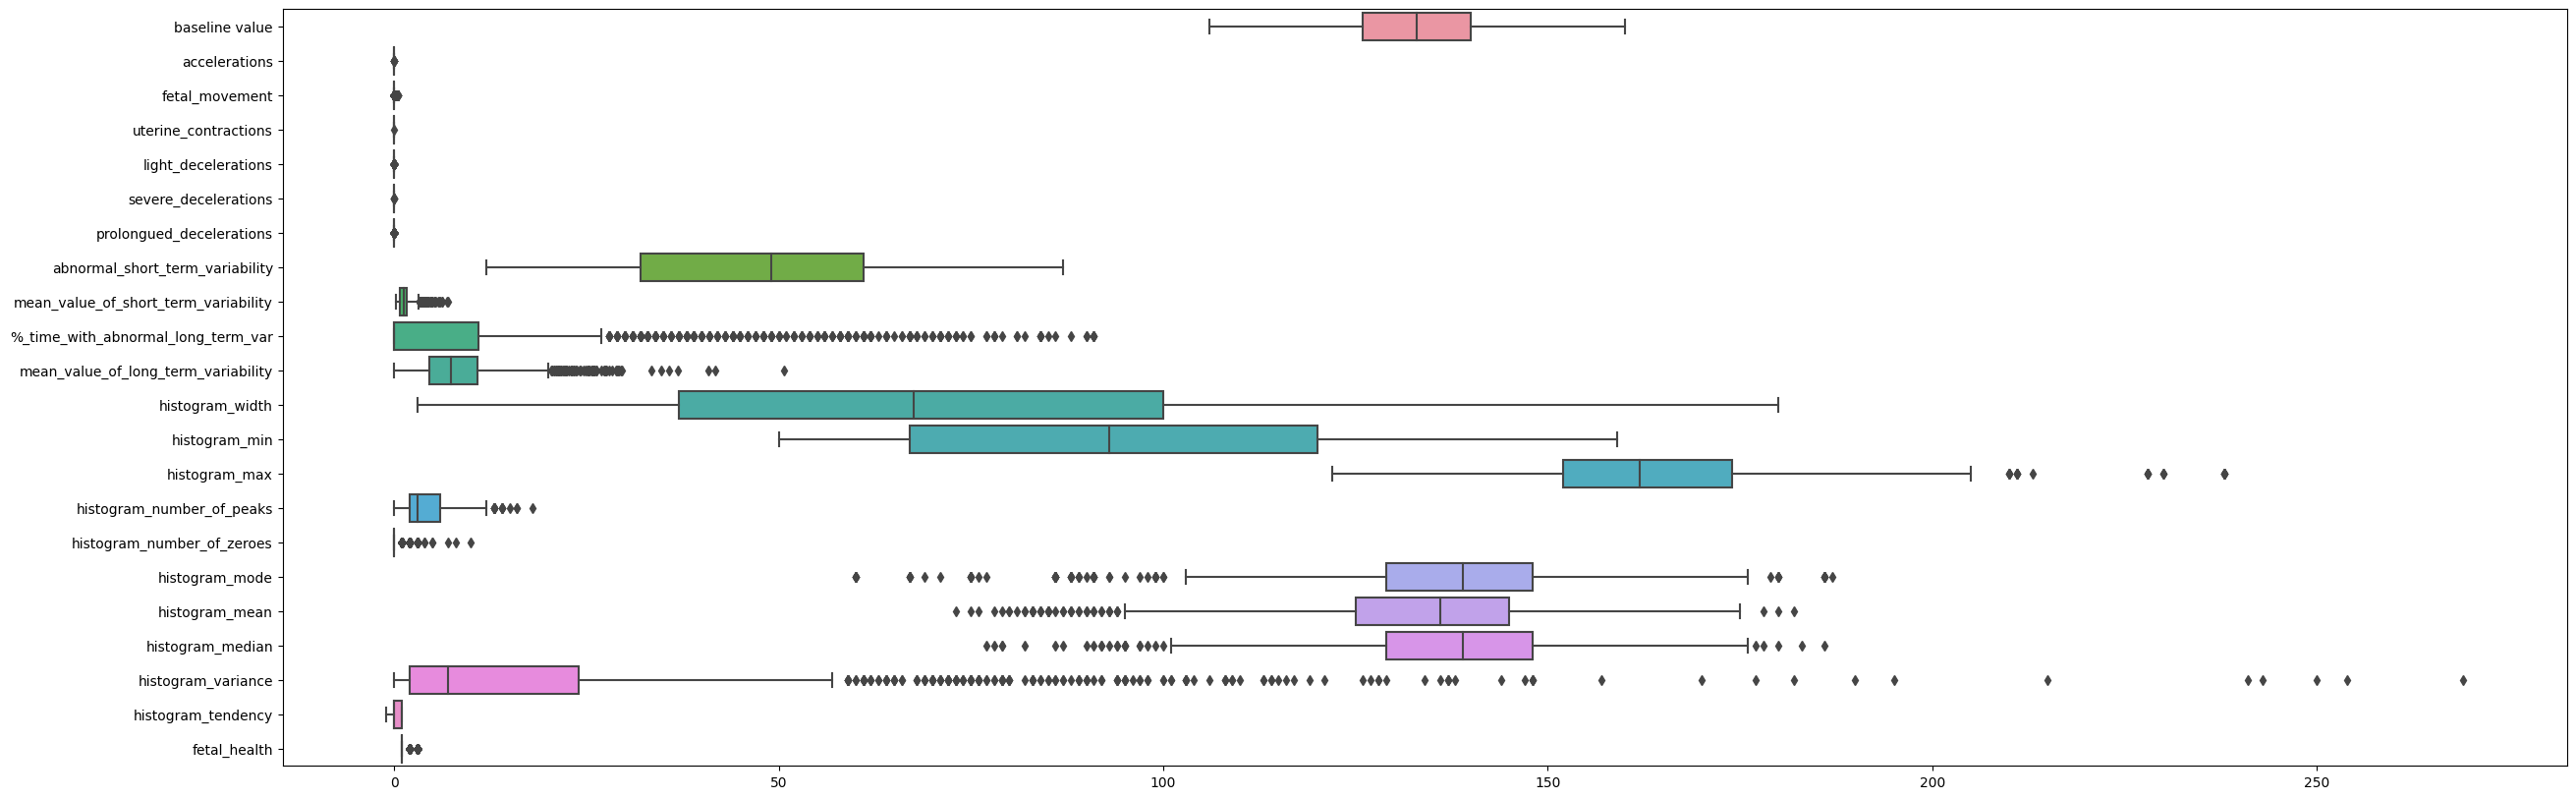

In [14]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax=ax, data=df,orient='h')

Outliers are very numerous and scattered within the dataset. Brutally eliminating them would mean not only significantly reducing the dataset but almost certainly depriving oneself of the information necessary to identify suspicious or pathological cases.

Given the nature of the problem, it is very probable, in fact, that these points are actually genuine data and for this reason they will be kept in full

## 3.5 Correlation Matrix

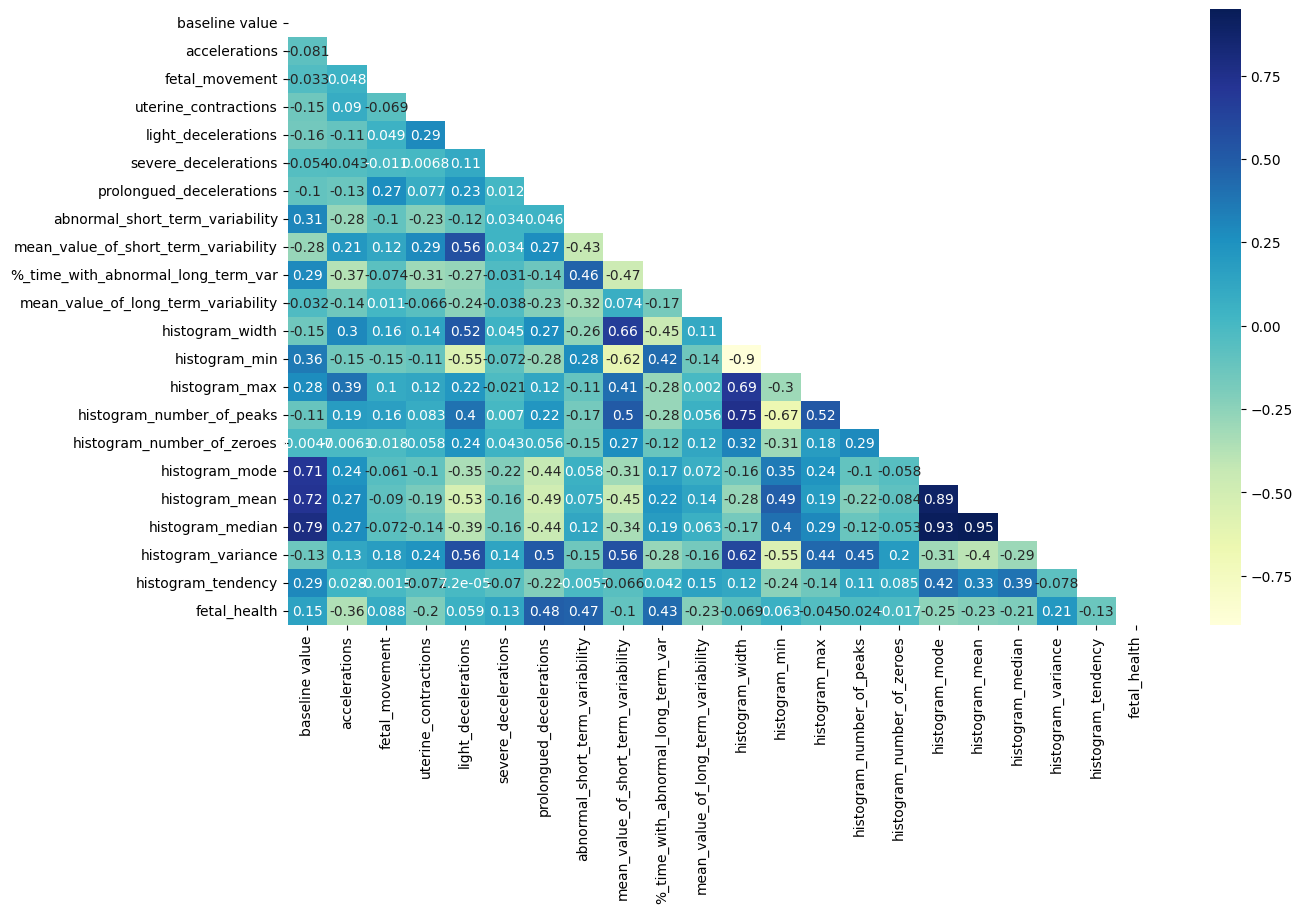

In [15]:
plt.figure(figsize=(14,8))
# Genera una mask per visualizzare solo un triangolo
mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))
# Visualizza heatmap
sns.heatmap(df.corr(numeric_only = True), cbar = True, annot = True, cmap="YlGnBu", mask = mask);

The feature **fetal_health** is well related with:

-  prolongued_decelerations
-  abnormal_short_term_variability
-  accelerations
-  %_time_with_abnormal_long_term_variablity
-  mean_value_of_long_term_variability
-  histogram_mode
-  histogram_mean
-  histogram_median
-  histogram_variance  

We could drop the features which present strong correlations with other features, this because they should not give a significant contribution to the predictive analysis (they would be a linear combination of the others), thus lightening the cost of the calculation. However the problem is not particularly 'heavy' so it was decided to keep all the features

# 4. Pre-Process

## 4.1 Train-Test Split

In [16]:
X_train, X_test,y_train,y_test=train_test_split(df_feature,df_target,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Distribuzione delle classi nel test')

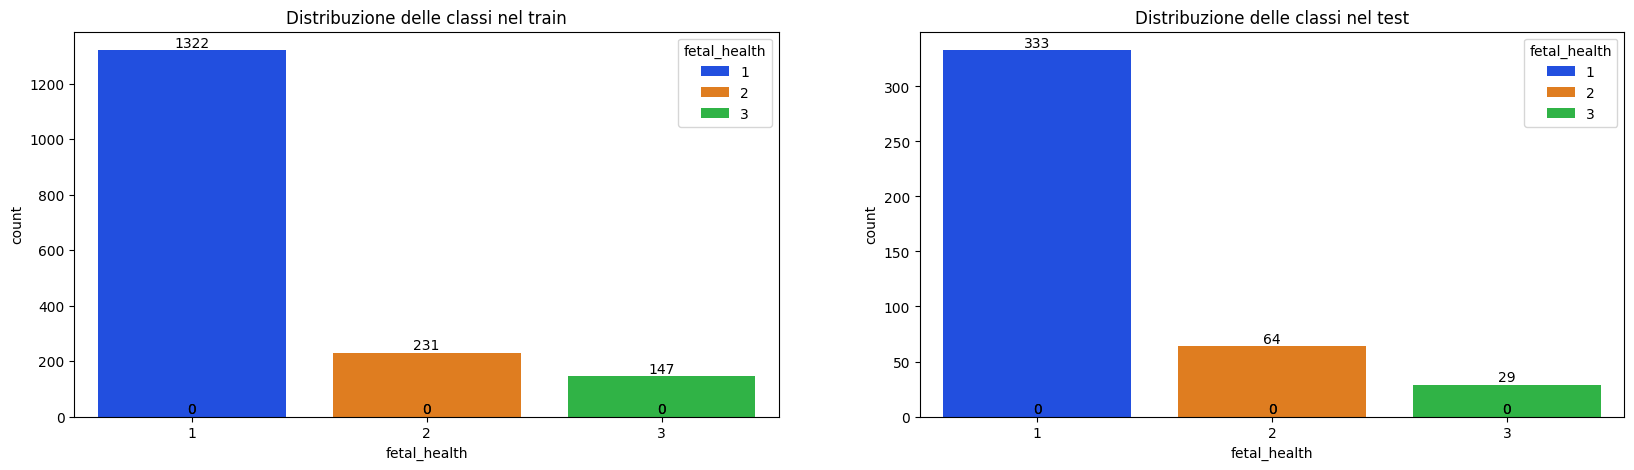

In [57]:
df_train=X_train.copy()
df_train['fetal_health']=y_train
df_test=X_test.copy()
df_test['fetal_health']=y_test

fig,ax=plt.subplots(1,2,figsize=(20,5))
g1=sns.countplot(data=df_train,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[0],dodge=False)
g1.bar_label(g1.containers[0]);
g1.bar_label(g1.containers[1]);
g1.bar_label(g1.containers[2]);
ax[0].set_title('Train Class distribution')

g2=sns.countplot(data=df_test,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[1],dodge=False)
g2.bar_label(g2.containers[0]);
g2.bar_label(g2.containers[1]);
g2.bar_label(g2.containers[2]);
ax[1].set_title('Test Class distribution')

## 4.2 Data Balancing with SMOTE

SMOTE is an ***over-sampling*** technique, which consists in starting from an unbalanced data set to obtain, through some mechanisms, a balanced distribution.

SMOTE generates "synthetic" observations starting from the minority class and adds them to the existing data set. The artificial minority class records are generated based on similarity in the predictor space.

This technique will be performed only on the TRAIN in order to leave the TEST intact for the final prediction.

In [58]:
# i dati sembrano sbilanciati. Uso una tecnica di ricampionamento SMOTE
sm=SMOTE(random_state=42)

#da ora in avanti si userà la lettera s per indicare dati bilanciato con SMOTE
Xs_train,ys_train=sm.fit_resample(X_train,y_train)

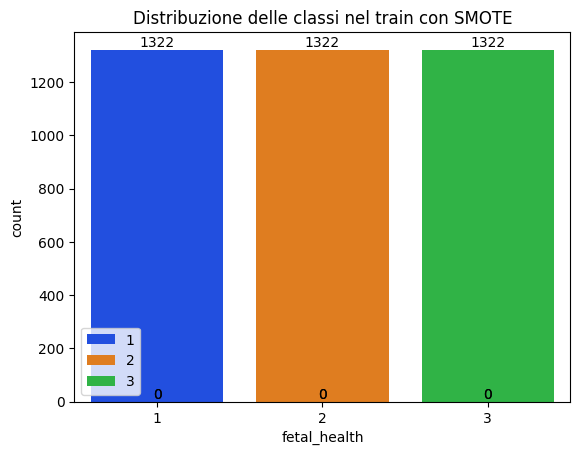

In [63]:
dfs_train=Xs_train.copy()
dfs_train['fetal_health']=ys_train

g3=sns.countplot(dfs_train,x='fetal_health',hue='fetal_health',palette='bright',dodge=False)
g3.bar_label(g3.containers[0]);
g3.bar_label(g3.containers[1]);
g3.bar_label(g3.containers[2]);
g3.set_title('Train Class Distribution with SMOTE')
plt.legend(loc='lower left')

## 4.3 Data Scaling with MinMaxScaler

Considering that the features have different orders of magnitude, we decide to scale the data using MinMaxScaler. This time it is important that the TEST has the same scale as the TRAIN, so MinMaxScaler will be CALCULATED from the TRAIN and APPLIED to the TRAIN and TEST

In [19]:
scaler=StandardScaler()

#set di dati bilanciato e scalato
Xs_train_scaled=pd.DataFrame(scaler.fit_transform(Xs_train), columns=Xs_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=Xs_train.columns)

#set di dati scalato
X_train_onlyscaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_onlyscaled=pd.DataFrame(scaler.transform(X_test),columns=Xs_train.columns)

## 4.4 Graphical representation of features after SMOTE and MINMAXSCALER

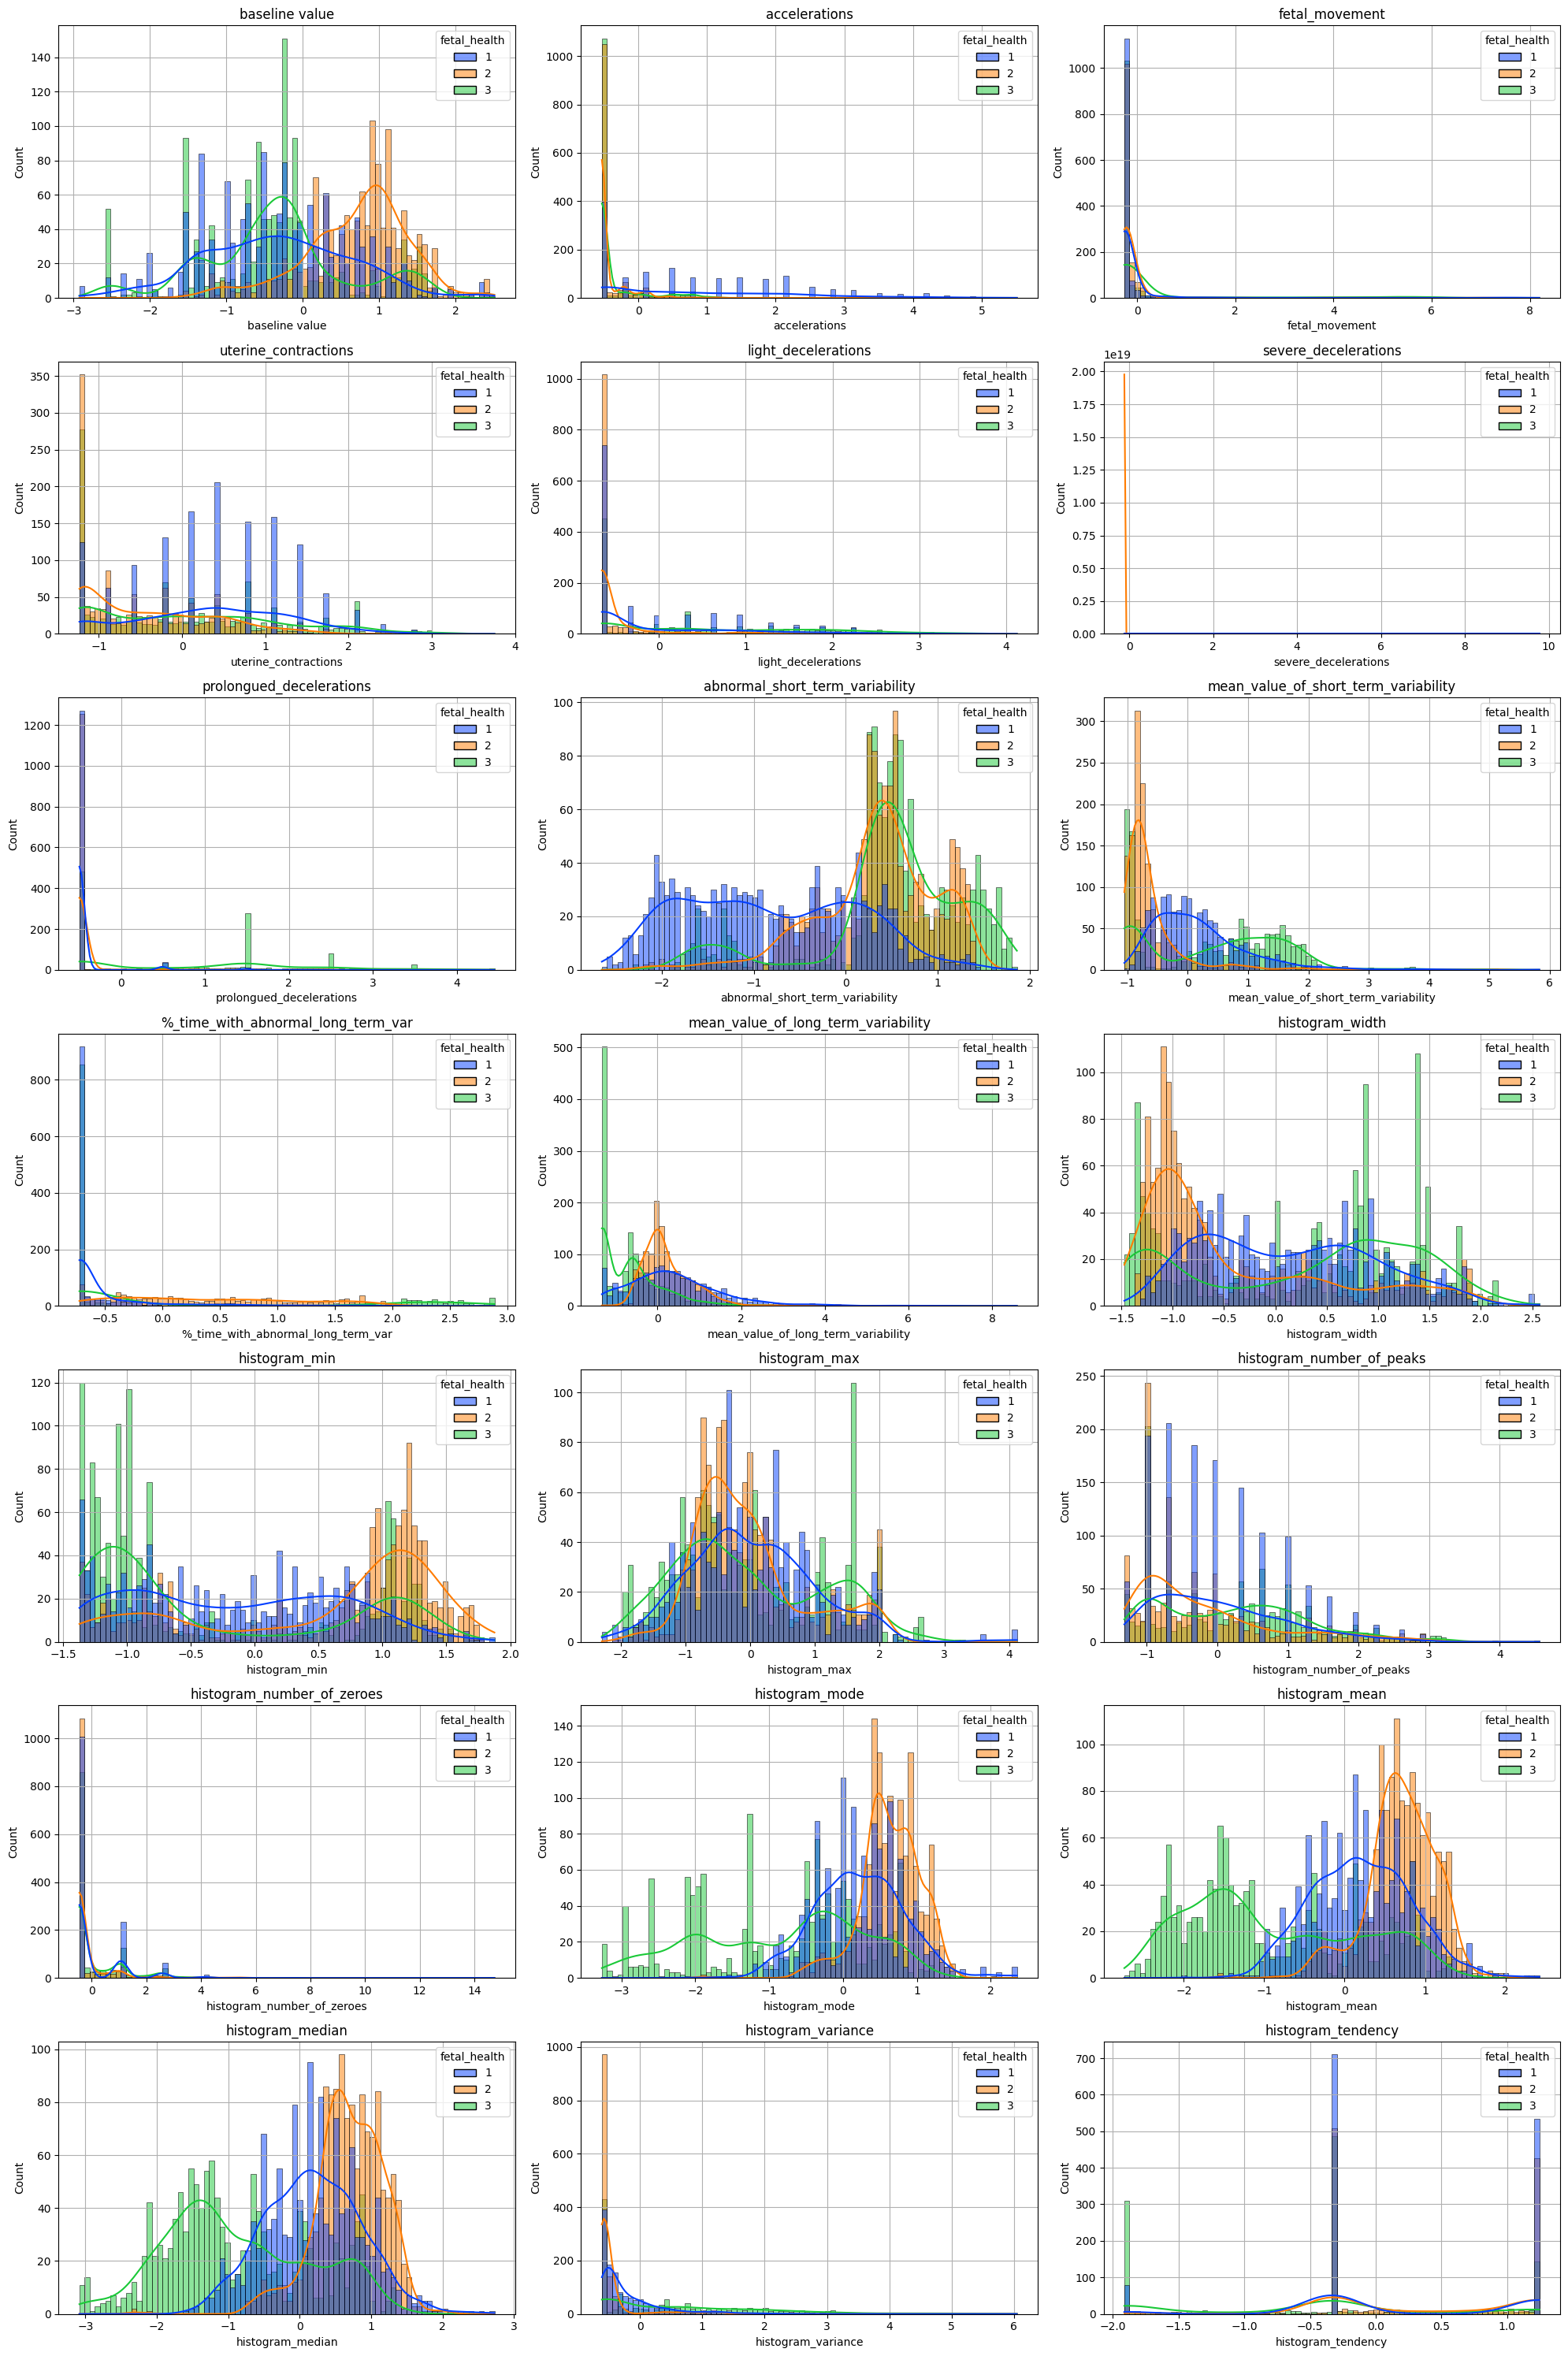

In [20]:
dfs=Xs_train_scaled.copy()
dfs['fetal_health']=ys_train
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(df_feature.columns):#.drop(['histogram_min','histogram_mode','histogram_median'])):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()

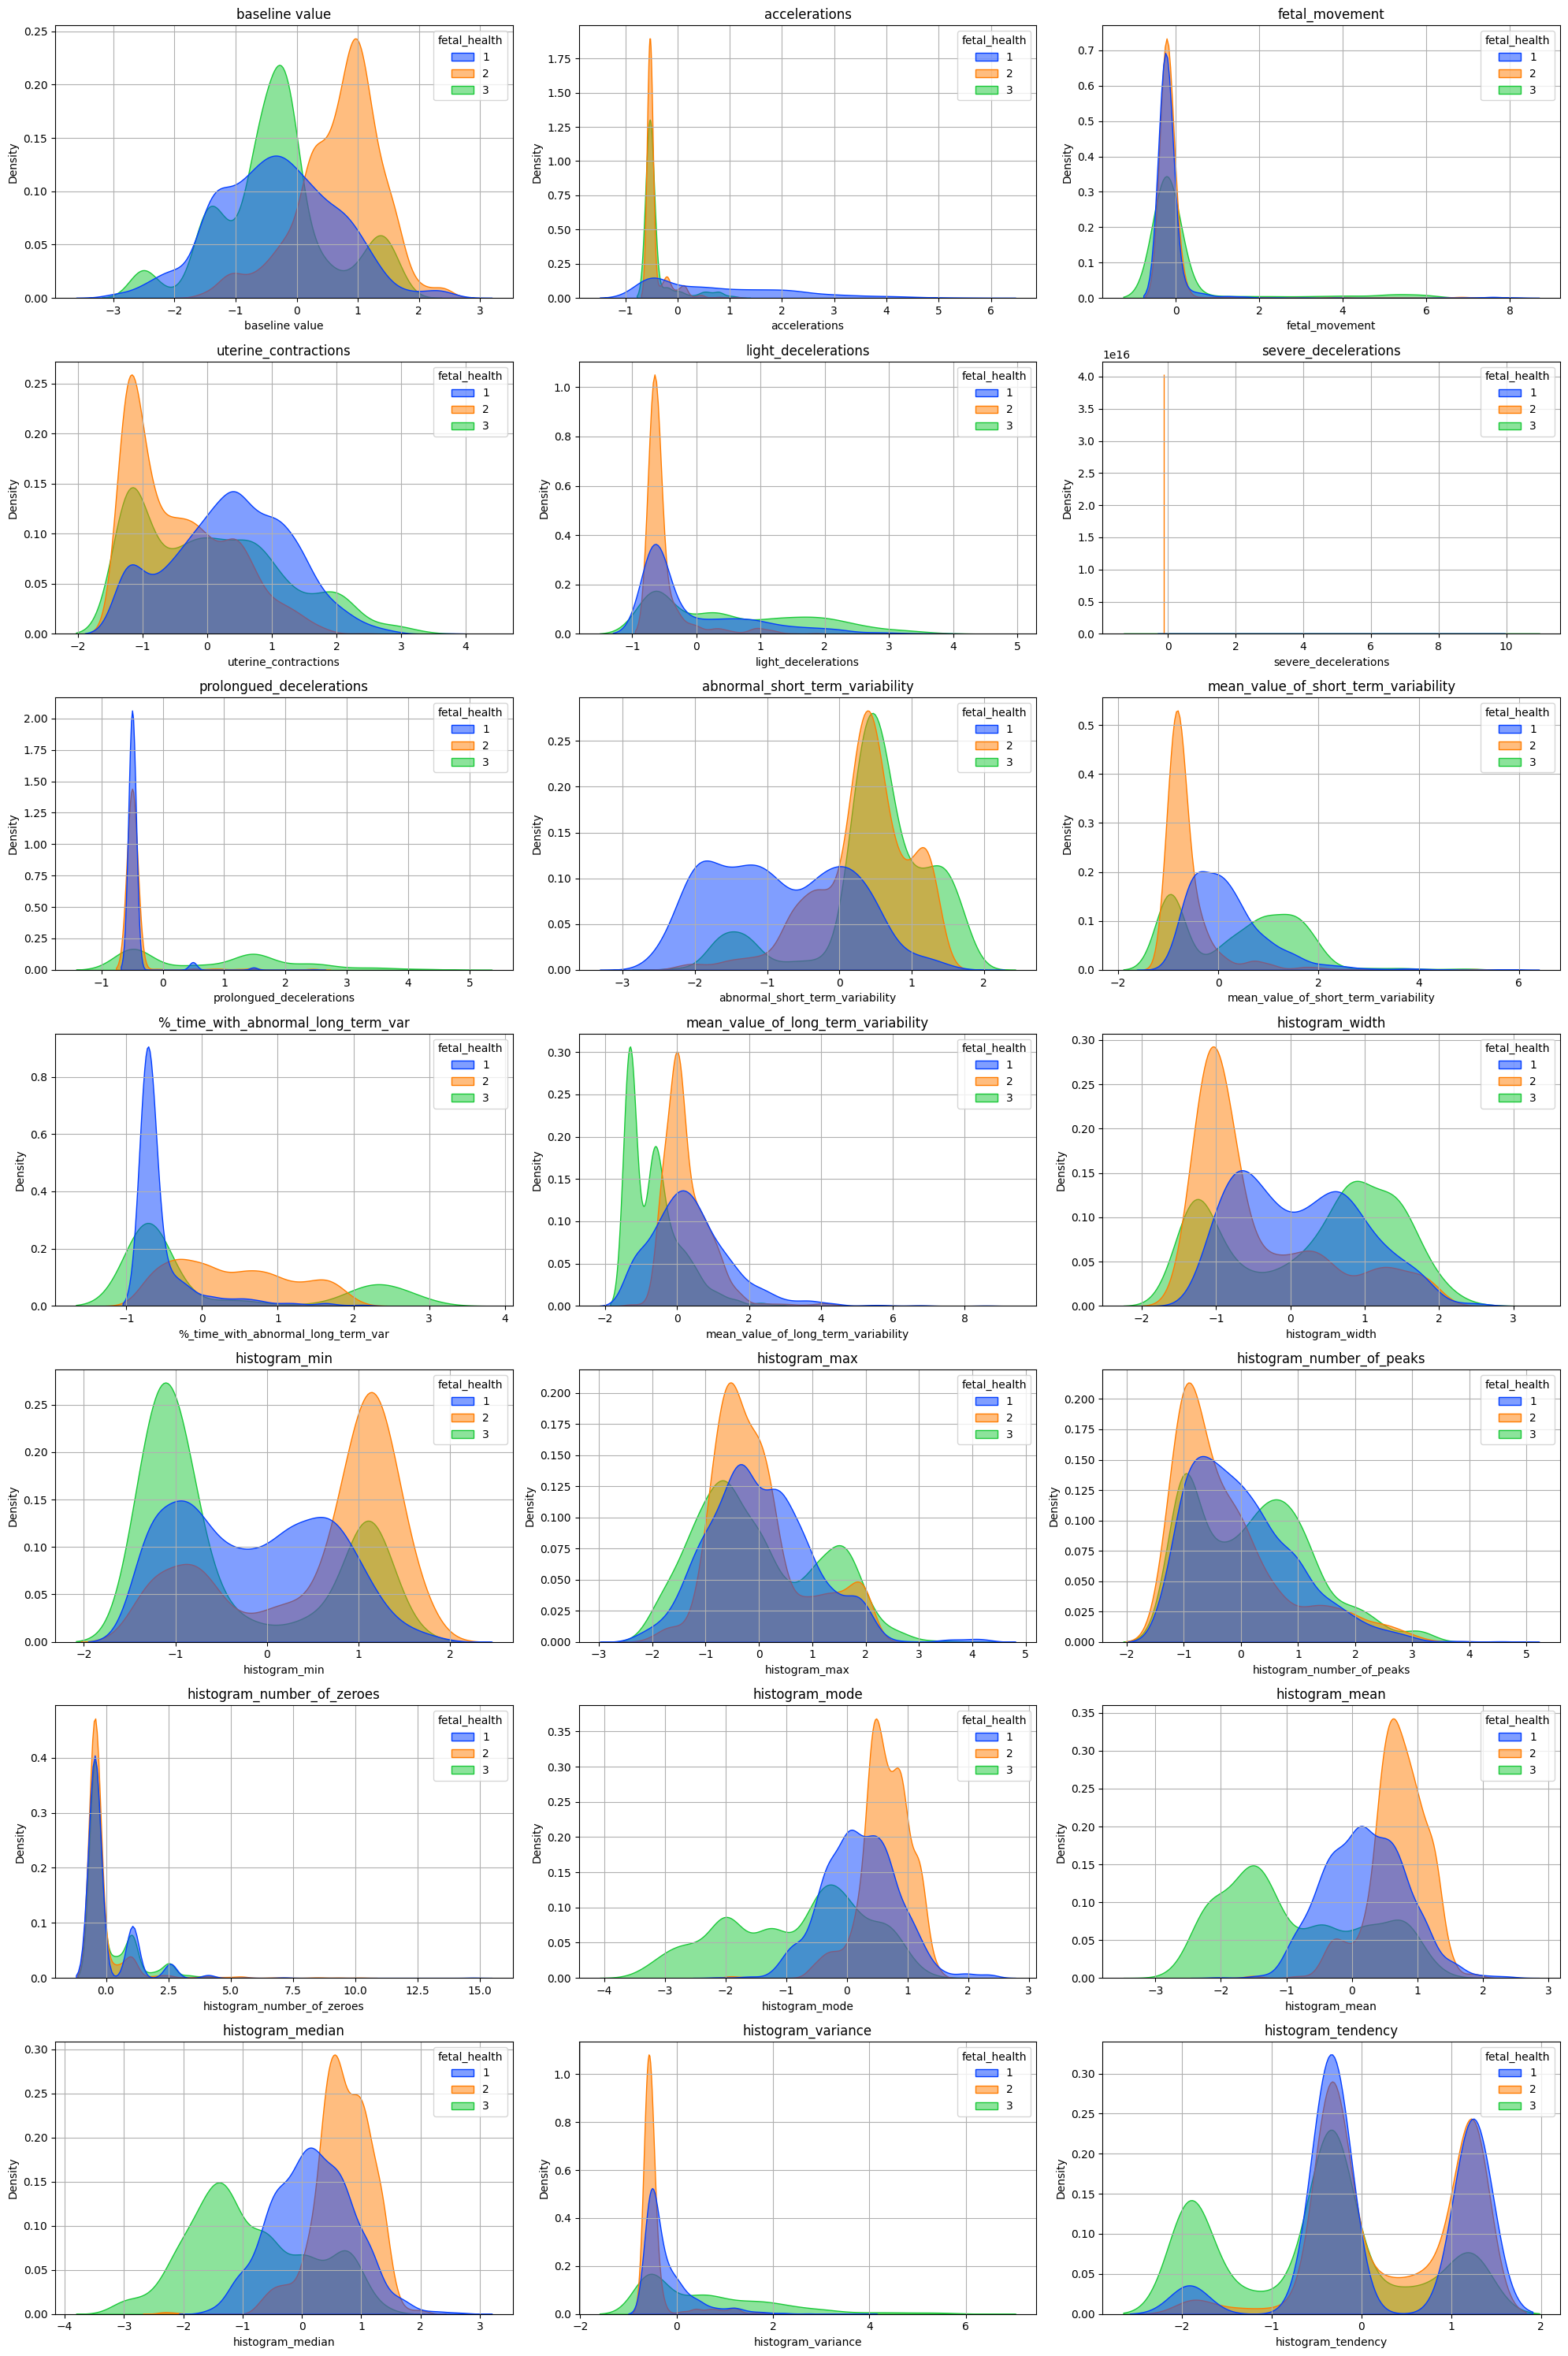

In [21]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, feature in enumerate(df_feature.columns):
    sns.kdeplot(dfs,x=feature,hue='fetal_health',ax=ax[i],palette='bright',fill=True,alpha=0.5)
    ax[i].set_title(feature)
    ax[i].grid()
plt.tight_layout()

### 4.4.1 Comparison between before and after balancing

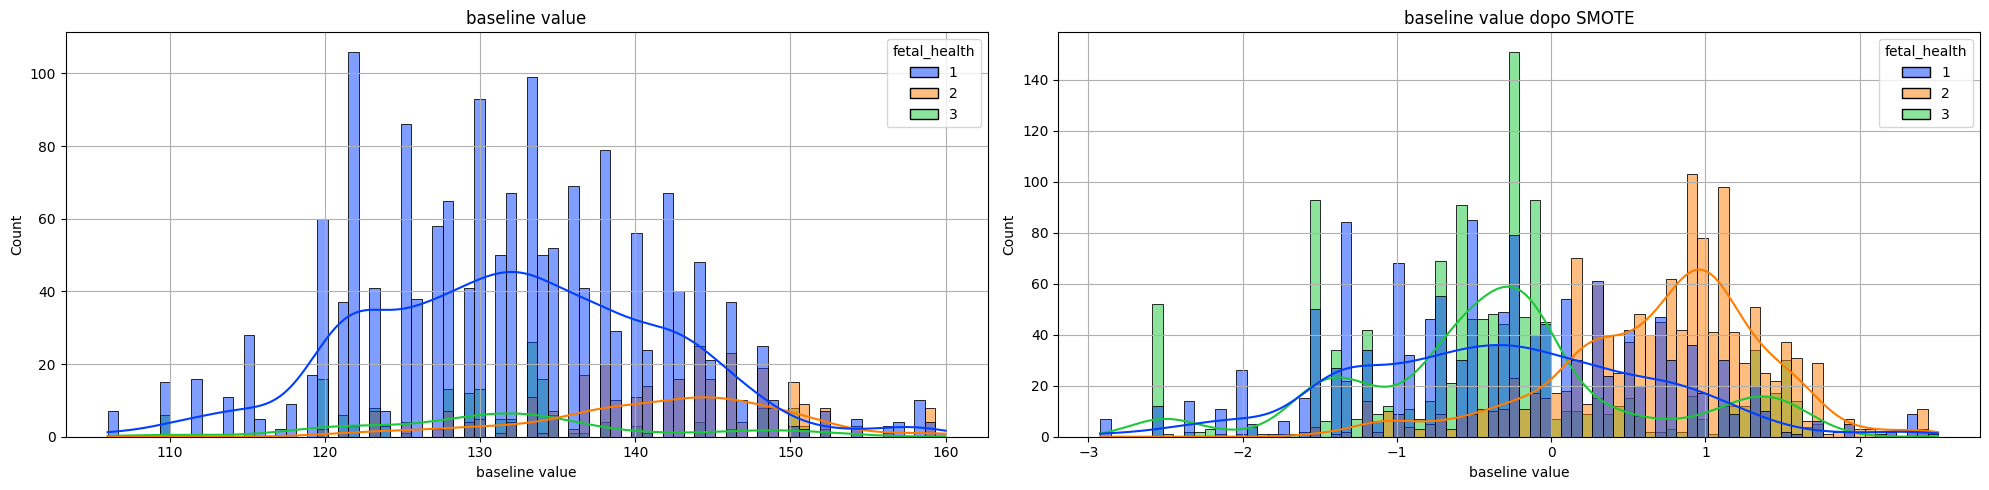

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax=ax.ravel()
sns.histplot(df,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[0],palette='bright')
ax[0].set_title('baseline value')
ax[0].grid()
sns.histplot(dfs,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[1],palette='bright')
ax[1].set_title('baseline value dopo SMOTE')
ax[1].grid()

plt.tight_layout()

As can be seen, the numbers of data from classes 2 and 3, which were in short supply, have increased.

# 5 Predictive Models

The analysis was developed in the following stages:

- **Validation:** the best accuracy is found among the cross-validation methods: cv=10, K-Fold and Stratified K-Fold for normal, balanced and scaled+balanced datasets
- **Optimization of Hyperparameters:** once the data set and the cross validation that defines the best score have been identified, the GridSearch is performed on these for parameter optimization
- **Prediction:** the model with the best parameters is used to predict the test variables
- **Metrics:** Precision, Recall, F1-Score, Accuracy of train and test are calculated
- **Feature Importance:** the features that participate with greater weight in determining the class are identified

The models compared are:

- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **K-Neghbors Classifier**
- **XGBoost**

In [93]:
#inizializzo il dataframe dove raccogliere i dati dei singoli modelli
df_acc_pred=pd.DataFrame(columns=['Accuracy','Precision','Recall','F-score','Validation','Data'])

## 5.1 Logistic Regression

### Validation

In [65]:
#definisco il modello
lr = LogisticRegression(max_iter=1000, random_state=42)

#introduco metodi di validazione
stkfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
kfold = KFold(n_splits=10, shuffle=True,random_state=42)
fold=[kfold,stkfold,10]

# raccolgo le coppie di dati su cui eseguire la validazione : dati originali - dati bilanciati con SMOTE- dati scalati e bilanciati
data=[[X_train,y_train],[X_train_onlyscaled,y_train],[Xs_train,ys_train],[Xs_train_scaled,ys_train]]

acc=np.array([])
# per le tre coppie di dati eseguo due differenti metodi di validazione kfold e StratifiedKfold. L'ultimo è solitamente usato nel caso di dati sbilanciati  
for n_fold,f in enumerate(fold):
        for x in data:
            acc=np.append(acc,round(cross_val_score(lr, x[0],x[1] , cv=f, scoring='f1_micro',n_jobs=-1).mean(),4))
        acc=np.append(acc,n_fold)

acc=acc.reshape(3,5)
acc_lr_val=pd.DataFrame(columns=['LR','LR Scaled','LR Smote','LR Smote+Scaled'],index=['K-Fold','STK-Fold','cv=10'],data=acc[:,:-1])

acc_lr_val

LR  LR Scaled  LR Smote  LR Smote+Scaled
K-Fold    0.8765     0.8953    0.8263           0.8938
STK-Fold  0.8788     0.8947    0.8245           0.8959
cv=10     0.8829     0.8959    0.8260           0.8941

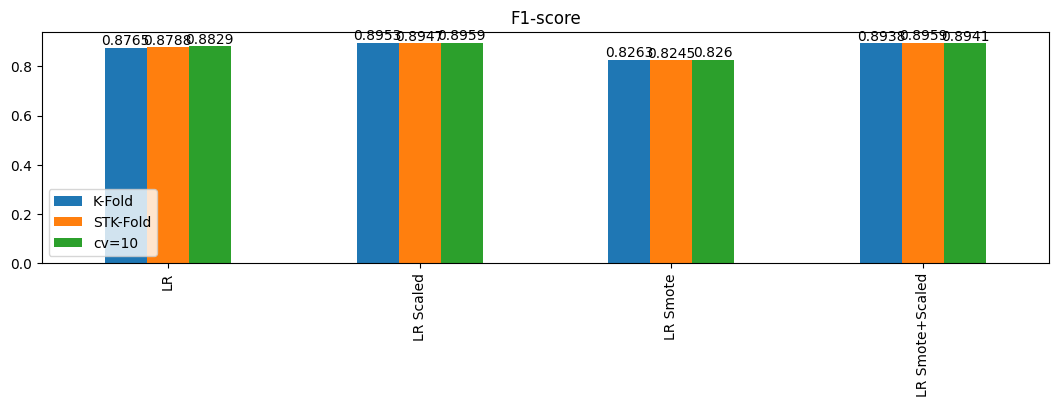

In [66]:
g=acc_lr_val.T.plot(kind='bar',figsize=(13,3),)
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.set_title('F1-score')
plt.legend(loc='lower left')

In logistic regression, scaling produces benefits in the calculation of the score, while the opposite balancing is pejorative. One of the best results is achieved for data scaled and balanced with the Stratified K-fold method. In the next step the parameters will be optimized with this configuration

### HyperParameter Optimization

In [90]:
#preparing parameter values to be validated
lr_params = [
             {"solver": ['newton-cg'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none']},
             {"solver": ['lbfgs'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none'] },
             {"solver": ['liblinear'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l1', 'l2']}]

lr_search = GridSearchCV(estimator= lr, param_grid=lr_params, cv=stkfold, scoring='f1_micro', verbose=1 , n_jobs=-1)

In [91]:
# Valuto i migliori iperparametri sui dati di test bilanciati e scalati
lr_search.fit(Xs_train_scaled,ys_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2', 'none'], 'solver': ['newton-cg']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2', 'none'], 'solver': ['lbfgs']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='f1_micro', verbose=1)

In [92]:
lr_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

### Prediction

In [94]:
# faccio la predizione sul train con i migliori iperparametri
y_train_pred_lr=lr_search.best_estimator_.predict(Xs_train_scaled)
# predizione del test con i migliori iperparametri
y_test_pred_lr=lr_search.best_estimator_.predict(X_test_scaled)

#misuro l'accuratezza rispetto a y_train
acc_train=accuracy_score(ys_train,y_train_pred_lr)
acc_test=accuracy_score(y_test,y_test_pred_lr)

precision, recall, f_score, support = precision_recall_fscore_support(y_test,y_test_pred_lr,average='weighted')
acc_train=round(acc_train,3)
acc_test=round(acc_test,3)
precision=round(precision,3)
recall=round(recall,3)
f_score=round(f_score,3)

print()
print('Accuracy train: {}'.format(acc_train))
print('Accuracy test: {}'.format(acc_test))
print('Precision test: {}'.format(precision))
print('Recall test: {}'.format(recall))
print('F-score: {}'.format(f_score))
print()
print(classification_report(y_test,y_test_pred_lr))

dati={
    'Accuracy':acc_test,
    'Precision':precision,
    'Recall':recall,
    'F-score':f_score,
    'Validation':'STK-Fold',
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['Logistic Regression',:]=dati
df_acc_pred



Accuracy train: 0.899

Accuracy test: 0.84

Precision test: 0.883

Recall test: 0.84

F-score: 0.854



              precision    recall  f1-score   support



           1       0.98      0.86      0.92       333

           2       0.54      0.77      0.63        64

           3       0.53      0.79      0.64        29



    accuracy                           0.84       426

   macro avg       0.68      0.81      0.73       426

weighted avg       0.88      0.84      0.85       426




Accuracy Precision Recall F-score Validation          Data
Logistic Regression     0.84     0.883   0.84   0.854   STK-Fold  Smote+Scaled

In [31]:
#g=df_acc_pred.loc['Logistic Regression'][:-2].plot(kind='bar',figsize=(16,4))
#g.bar_label(g.containers[0],label_type='edge')
#plt.legend(loc='lower left')

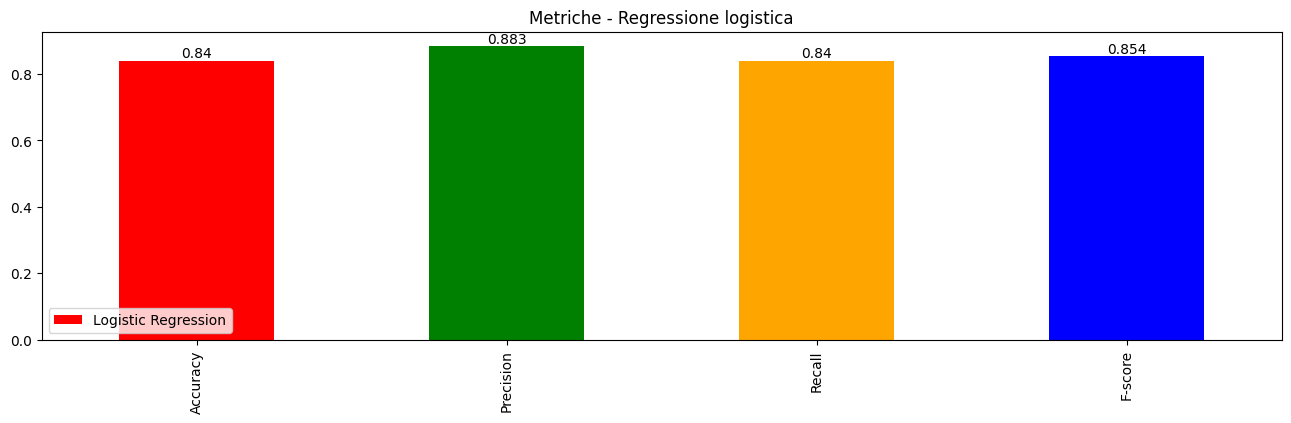

In [86]:
g=df_acc_pred.loc['Logistic Regression'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche - Regressione logistica')
plt.legend(loc='lower left')

### Confusion Matrix

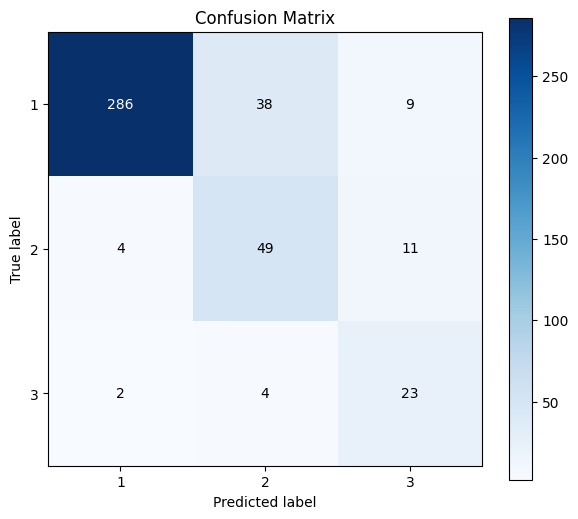

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_lr, normalize=False, figsize=(7,6))
plt.show()

In this case the model predicts 286 correct records for class 1 (normal) 47 wrong, 49 wrong for class 2 (suspect) wrong 15, 23 wrong for class 3 (pathological) wrong 6

### Feature Importance

<AxesSubplot: title={'center': 'Feature Importance - Regressione logistica'}>

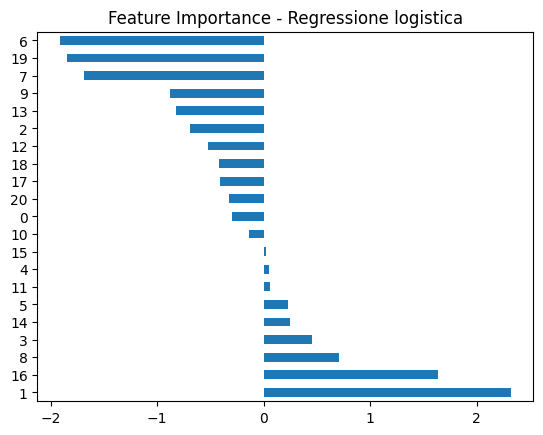

In [34]:
lr.fit(Xs_train_scaled,ys_train)
importance = lr.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(21).plot(kind='barh',title = 'Feature Importance - Regressione logistica')

In [35]:
abs(lr.coef_[0][[6,19,7,1,16,8]])

array([1.91188433, 1.84966687, 1.68269903, 2.3226181 , 1.63373604,
       0.70981936])

In [36]:
#elenco delle prime 6 feature più importanti, in ordine di importanza
list(X_train.columns[[1,6,19,7,16,8]])

['accelerations',
 'prolongued_decelerations',
 'histogram_variance',
 'abnormal_short_term_variability',
 'histogram_mode',
 'mean_value_of_short_term_variability']

### TOP 6 Feature Importance

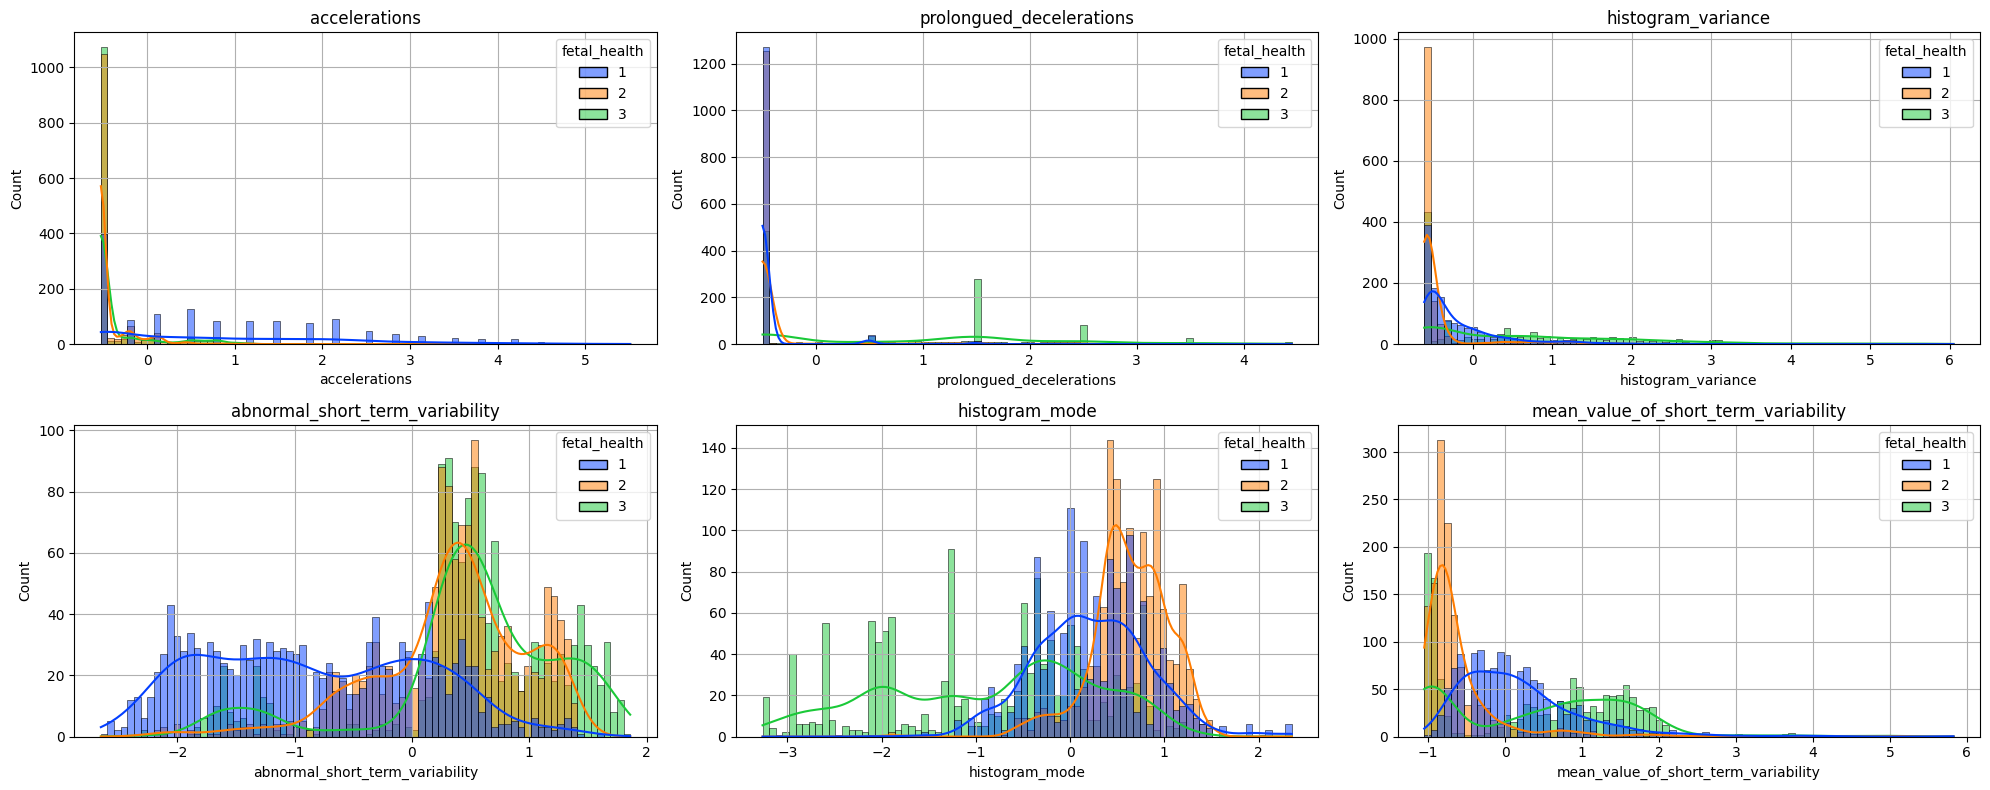

In [37]:
fig,ax=plt.subplots(2,3,figsize=(20,8))
ax=ax.ravel()
for i, col in enumerate(X_train.columns[[1,6,19,7,16,8]]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()

plt.tight_layout()

## DecisionTree Classifier

### Validation

In [95]:
#definisco il modello
Decision3 = DecisionTreeClassifier(random_state=42)

#introduco metodi di validazione
stkfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
kfold = KFold(n_splits=10, shuffle=True,random_state=42)
fold=[kfold,stkfold,10]

# raccolgo le coppie di dati su cui eseguire la validazione : dati originali - dati bilanciati con SMOTE- dati scalati e bilanciati
data=[[X_train,y_train],[X_train_onlyscaled,y_train],[Xs_train,ys_train],[Xs_train_scaled,ys_train]]

acc=np.array([])
# per le tre coppie di dati eseguo due differenti metodi di validazione kfold e StratifiedKfold. L'ultimo è solitamente usato nel caso di dati sbilanciati  
for n_fold,f in enumerate(fold):
        for x in data:
            acc=np.append(acc,round(cross_val_score(Decision3, x[0],x[1] , cv=f, scoring='f1_micro',n_jobs=-1).mean(),4))
        acc=np.append(acc,n_fold)

acc=acc.reshape(3,5)
acc_D3_val=pd.DataFrame(columns=['D3','D3 scaled','D3 smote','D3 smote+scaled'],index=['K-Fold','STK-Fold','cv=10'],data=acc[:,:-1])

acc_D3_val

D3  D3 scaled  D3 smote  D3 smote+scaled
K-Fold    0.9112     0.9112    0.9581           0.9579
STK-Fold  0.9118     0.9135    0.9592           0.9592
cv=10     0.9118     0.9135    0.9597           0.9597

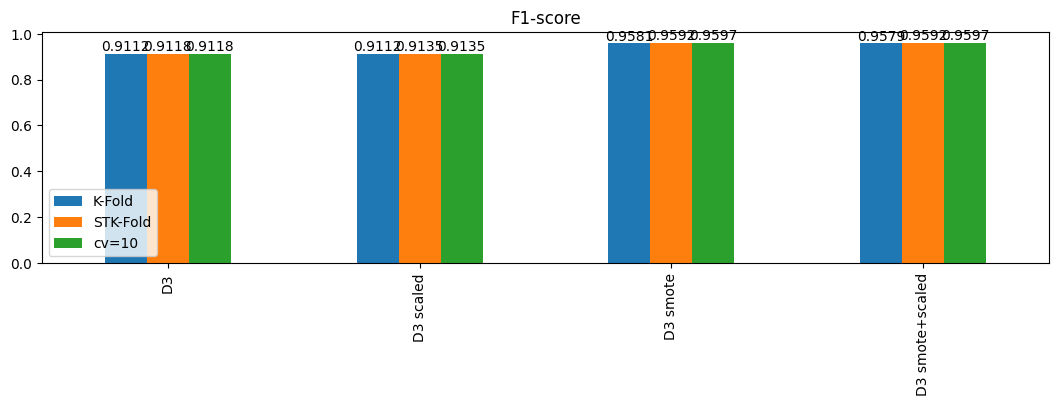

In [69]:
g=acc_D3_val.T.plot(kind='bar',figsize=(13,3))
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.set_title('F1-score')
plt.legend(loc='lower left')

The highest score is obtained for cv=10 both for the data balanced only and for those balanced and scaled together. The result is not surprising considering that decision tree methods do not need the data to be scaled. Instead, the advantage of balancing is clearly evident

You choose to continue with the parameters cv=10 and balanced and scaled data

### HyperParameter Optimization

In [96]:
#min_sample split =1 genera dei nan durante la ricerca. Vedi D3_search.cv_results_. Per indagare l'errore inserire error_score='raise'. In questo caso min_sample_split>=2 e tutto torna 
D3_params =  {
    'criterion':['gini','entropy'],
    'min_samples_split':range(2,10),
    'min_samples_leaf': range(1,5),
    'max_depth': [6, 9]}

#definisco i parametri del modello di ricerca
D3_search = GridSearchCV(estimator= Decision3, param_grid=D3_params, cv=10, scoring='f1_micro', verbose=1 , n_jobs=-1,error_score='raise')

In [97]:
D3_search.fit(Xs_train_scaled,ys_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6, 9],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='f1_micro', verbose=1)

In [98]:
print('Best Params:',D3_search.best_params_)
print('Best Estimators:',D3_search.best_estimator_)
print('Best Score:',D3_search.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}

Best Estimators: DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,

                       random_state=42)

Best Score: 0.9498377986413251


### Prediction

In [99]:
# faccio la predizione sul train
y_train_pred_D3=D3_search.best_estimator_.predict(Xs_train_scaled)
# predizione del test 
y_test_pred_D3=D3_search.best_estimator_.predict(X_test_scaled)

#misuro l'accuratezza rispetto a y_train
acc_train=accuracy_score(ys_train,y_train_pred_D3)
acc_test=accuracy_score(y_test,y_test_pred_D3)

precision, recall, f_score, support = precision_recall_fscore_support(y_test,y_test_pred_D3,average='weighted')
acc_train=round(acc_train,3)
acc_test=round(acc_test,3)
precision=round(precision,3)
recall=round(recall,3)
f_score=round(f_score,3)

print()
print('Accuracy train: {}'.format(acc_train))
print('Accuracy test: {}'.format(acc_test))
print('Precision test: {}'.format(precision))
print('Recall test: {}'.format(recall))
print('F-score: {}'.format(f_score))
print()
print(classification_report(y_test,y_test_pred_D3))

dati={
    'Accuracy':acc_test,
    'Precision':precision,
    'Recall':recall,
    'F-score':f_score,
    'Validation':'CV=10',
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['Decision Tree',:]=dati
df_acc_pred




Accuracy train: 0.98

Accuracy test: 0.932

Precision test: 0.94

Recall test: 0.932

F-score: 0.934



              precision    recall  f1-score   support



           1       0.98      0.93      0.96       333

           2       0.75      0.91      0.82        64

           3       0.85      0.97      0.90        29



    accuracy                           0.93       426

   macro avg       0.86      0.94      0.89       426

weighted avg       0.94      0.93      0.93       426




Accuracy Precision Recall F-score Validation          Data
Logistic Regression     0.84     0.883   0.84   0.854   STK-Fold  Smote+Scaled
Decision Tree          0.932      0.94  0.932   0.934      CV=10  Smote+Scaled

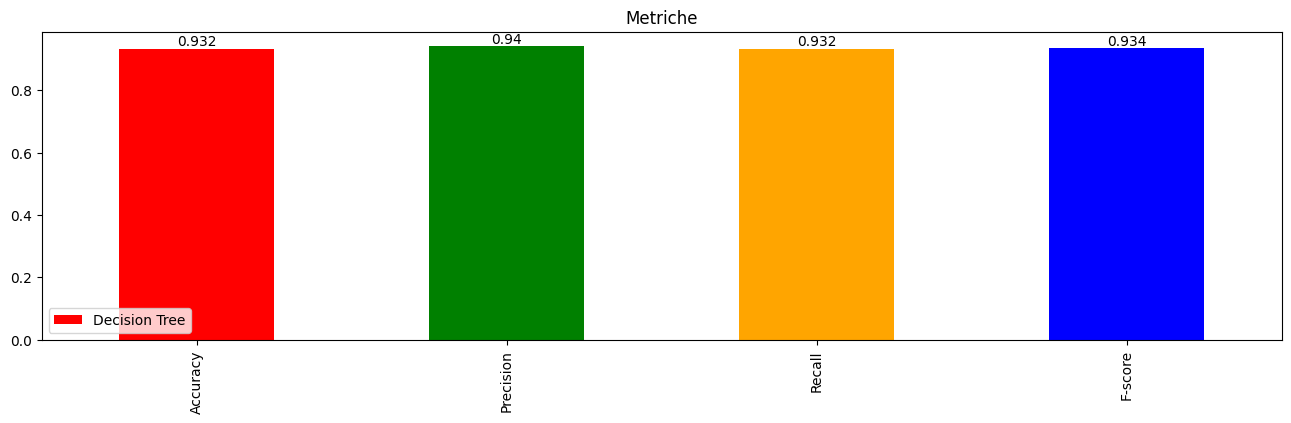

In [100]:
g=df_acc_pred.loc['Decision Tree'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche')
plt.legend(loc='lower left')

### Confusion Matrix

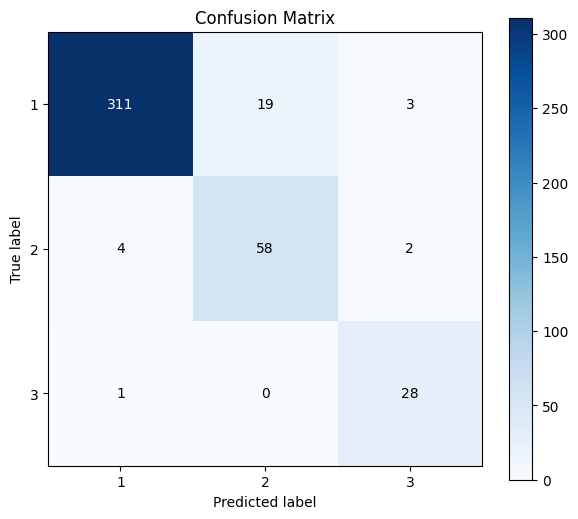

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_D3, normalize=False, figsize=(7,6))
plt.show()

In this case the model predicts 311 correct records for class 1 (normal) 22 wrong, 58 for class 2 (suspect) 6 wrong, 28 for class 3 (pathological) 1 wrong 

### Feature Importance

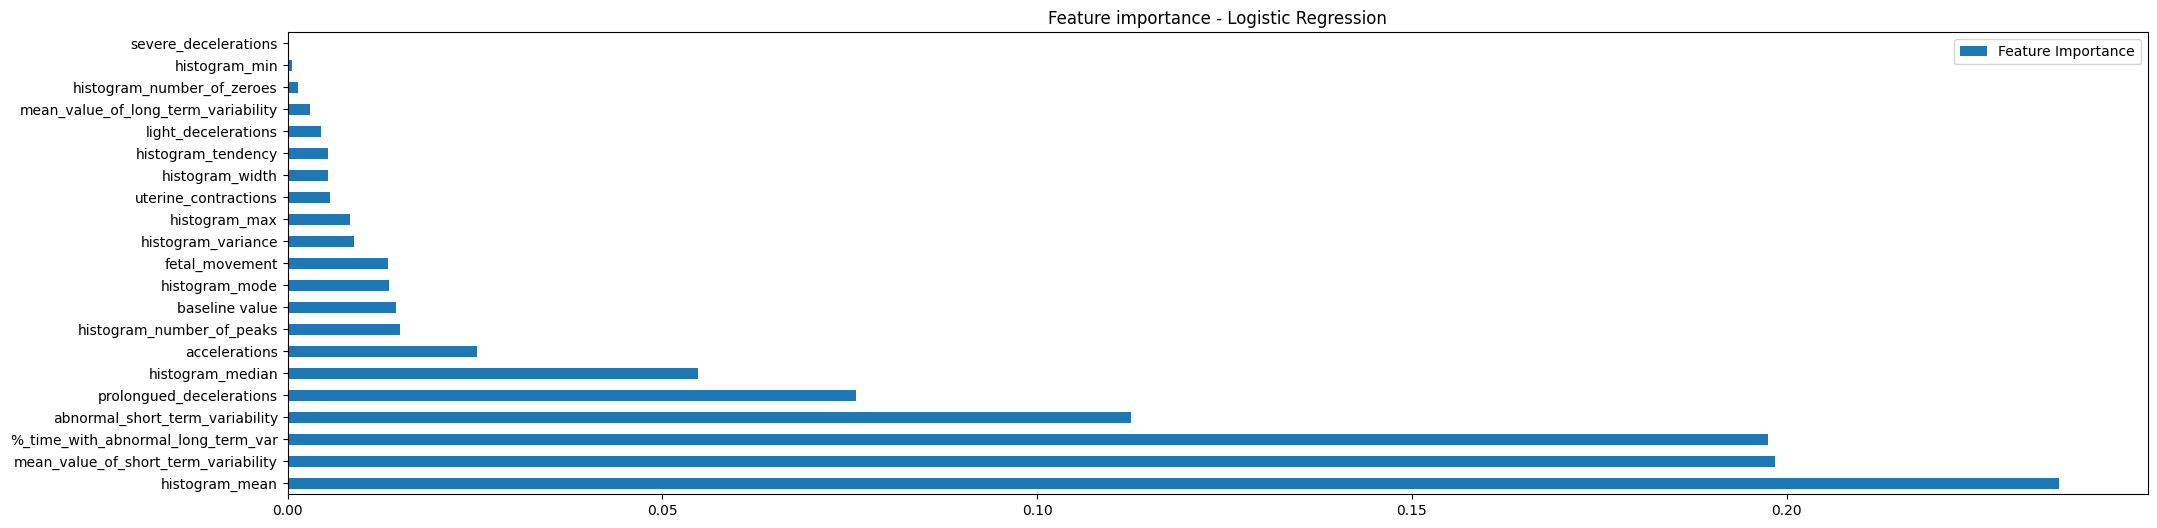

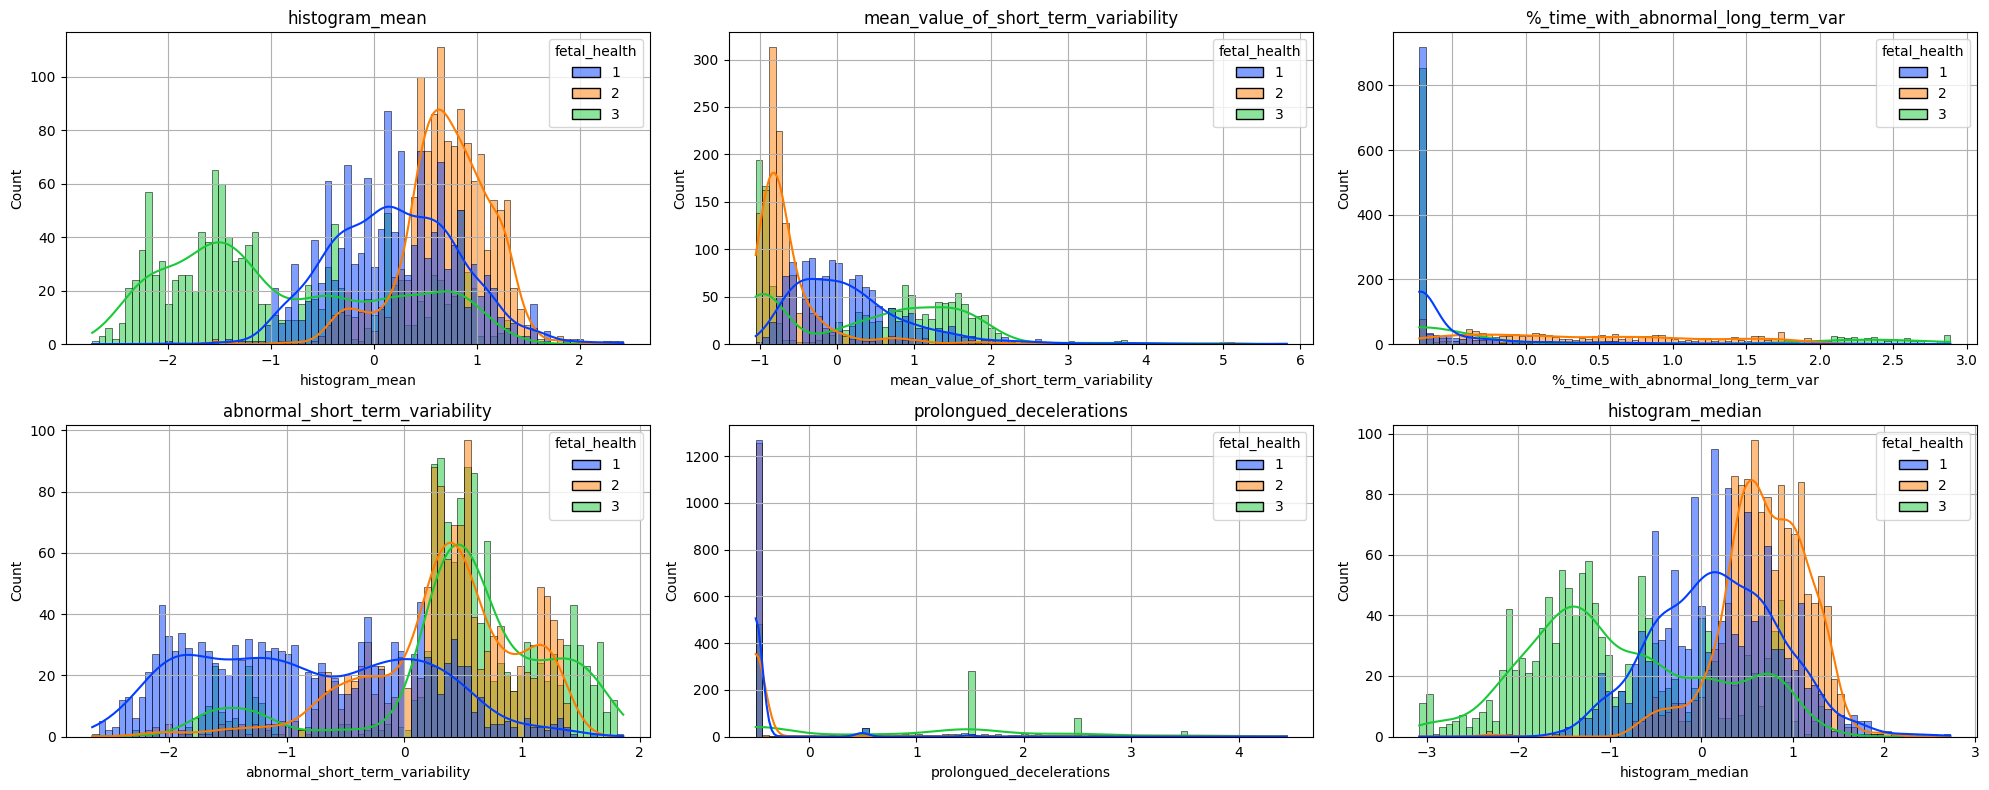

In [46]:
feature_importances = pd.DataFrame(D3_search.best_estimator_.feature_importances_, index=D3_search.best_estimator_.feature_names_in_,
                                  columns=['Feature Importance'])
feature_importances = feature_importances.sort_values(by='Feature Importance', ascending=False)

feature_importances.plot(kind='barh',figsize=(24,6),title='Feature importance - Logistic Regression')

fig,ax=plt.subplots(2,3,figsize=(20,8))
ax=ax.ravel()
for i, col in enumerate(feature_importances.index[0:6]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()

plt.tight_layout()

## Random Forest

### Validation

In [101]:
#Definisco il modello
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)#n_estimators=100

#introduco metodi di validazione
stkfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
kfold = KFold(n_splits=10, shuffle=True,random_state=42)
fold=[kfold,stkfold,10]

# raccolgo le coppie di dati su cui eseguire la validazione : dati originali - dati bilanciati con SMOTE- dati scalati e bilanciati
data=[[X_train,y_train],[X_train_onlyscaled,y_train],[Xs_train,ys_train],[Xs_train_scaled,ys_train]]

acc=np.array([])
# per le tre coppie di dati eseguo due differenti metodi di validazione kfold e StratifiedKfold. L'ultimo è solitamente usato nel caso di dati sbilanciati  
for n_fold,f in enumerate(fold):
        for x in data:
            acc=np.append(acc,round(cross_val_score(rfc, x[0],x[1] , cv=f, scoring='f1_micro',n_jobs=-1).mean(),4))
        acc=np.append(acc,n_fold)

acc=acc.reshape(3,5)
acc_rfc_val=pd.DataFrame(columns=['RFC','RFC scaled','RFC smote','RFC smote+scaled'],index=['K-Fold','STK-Fold','Cross-Validation'],data=acc[:,:-1])

acc_rfc_val

RFC  RFC scaled  RFC smote  RFC smote+scaled
K-Fold            0.9400      0.9376     0.9796            0.9798
STK-Fold          0.9435      0.9441     0.9786            0.9791
Cross-Validation  0.9347      0.9347     0.9793            0.9793

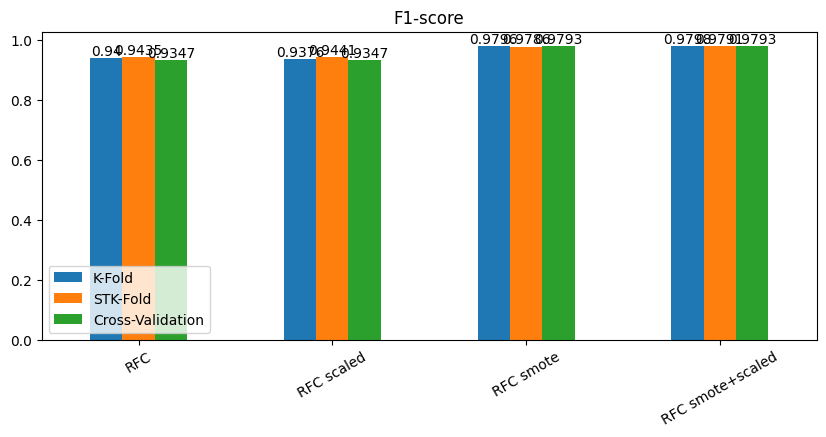

In [102]:
g=acc_rfc_val.T.plot(kind='bar',figsize=(10,4))
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.set_title('F1-score')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

We highlight the benefit of balancing from the data, while we see very little difference between balancing and balancing + scaling. This is because the Random Forest method is based on the Decision Tree, so the data does not need to be scaled.

The parameters will be optimized for the K-Fold method and with the balanced and scaled data set

### HyperParameter Optimization

In [103]:
#selezione dei parametri da validare
rfc_params = {
    'max_depth': [3,6,9],
    'n_estimators': [10, 100, 1000],
    'max_features':['sqrt', 'log2'], 
    'criterion':['gini', 'entropy'],
    'max_leaf_nodes': [3, 6, 9]
    }

#definisco i parametri del modello di ricerca
rfc_search = GridSearchCV(estimator= rfc, param_grid=rfc_params, cv=kfold, scoring='f1_micro', verbose=1 , n_jobs=-1)

In [104]:
# trovo gli ipermarametri sul set di dati train
rfc_search.fit(Xs_train_scaled, ys_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [10, 100, 1000]},
             scoring='f1_micro', verbose=1)

In [105]:
print('Best Params:',rfc_search.best_params_)
print('Best Estimators:',rfc_search.best_estimator_)
print('Best Score:',rfc_search.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 1000}

Best Estimators: RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=9,

                       n_estimators=1000, n_jobs=-1, random_state=42)

Best Score: 0.9039468997277561


### Prediction

In [106]:
# faccio la predizione sul train
y_train_pred_rfc=rfc_search.best_estimator_.predict(Xs_train_scaled)
# predizione del test 
y_test_pred_rfc=rfc_search.best_estimator_.predict(X_test_scaled)

#misuro l'accuratezza rispetto a y_train
acc_train=accuracy_score(ys_train,y_train_pred_rfc)
acc_test=accuracy_score(y_test,y_test_pred_rfc)

precision, recall, f_score, support = precision_recall_fscore_support(y_test,y_test_pred_rfc,average='weighted')
acc_train=round(acc_train,3)
acc_test=round(acc_test,3)
precision=round(precision,3)
recall=round(recall,3)
f_score=round(f_score,3)

print()
print('Accuracy train: {}'.format(acc_train))
print('Accuracy test: {}'.format(acc_test))
print('Precision test: {}'.format(precision))
print('Recall test: {}'.format(recall))
print('F-score: {}'.format(f_score))
print()
print(classification_report(y_test,y_test_pred_rfc))

dati={
    'Accuracy':acc_test,
    'Precision':precision,
    'Recall':recall,
    'F-score':f_score,
    'Validation':'K-Fold',
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['Random Forest',:]=dati
df_acc_pred



Accuracy train: 0.91

Accuracy test: 0.869

Precision test: 0.903

Recall test: 0.869

F-score: 0.878



              precision    recall  f1-score   support



           1       0.98      0.86      0.92       333

           2       0.59      0.88      0.70        64

           3       0.68      0.90      0.78        29



    accuracy                           0.87       426

   macro avg       0.75      0.88      0.80       426

weighted avg       0.90      0.87      0.88       426




Accuracy Precision Recall F-score Validation          Data
Logistic Regression     0.84     0.883   0.84   0.854   STK-Fold  Smote+Scaled
Decision Tree          0.932      0.94  0.932   0.934      CV=10  Smote+Scaled
Random Forest          0.869     0.903  0.869   0.878     K-Fold  Smote+Scaled

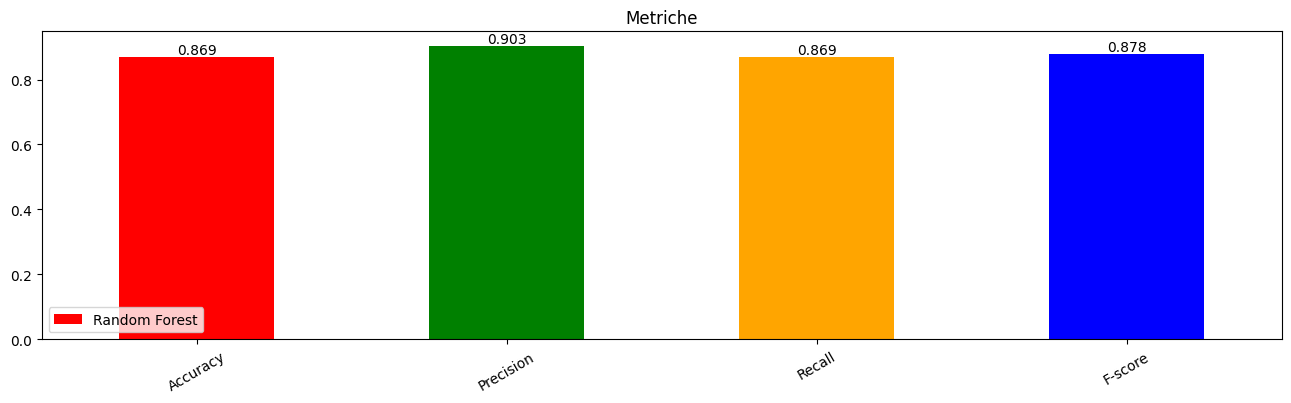

In [54]:
g=df_acc_pred.loc['Random Forest'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

### Confusion Matrix

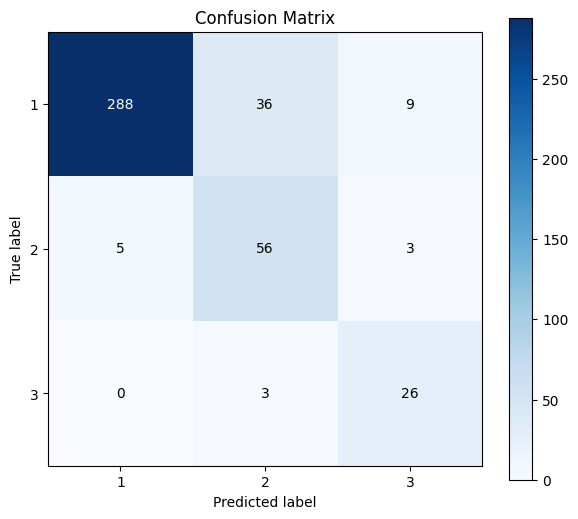

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_rfc, normalize=False, figsize=(7,6))
plt.show()

Random Forest predicts 288 correct records for class 1 (normal) with 45 errors, 56 with class 2 (suspect) with 8 errors, 26 with class 3 (pathological) with 3 errors

### Feature Importance 

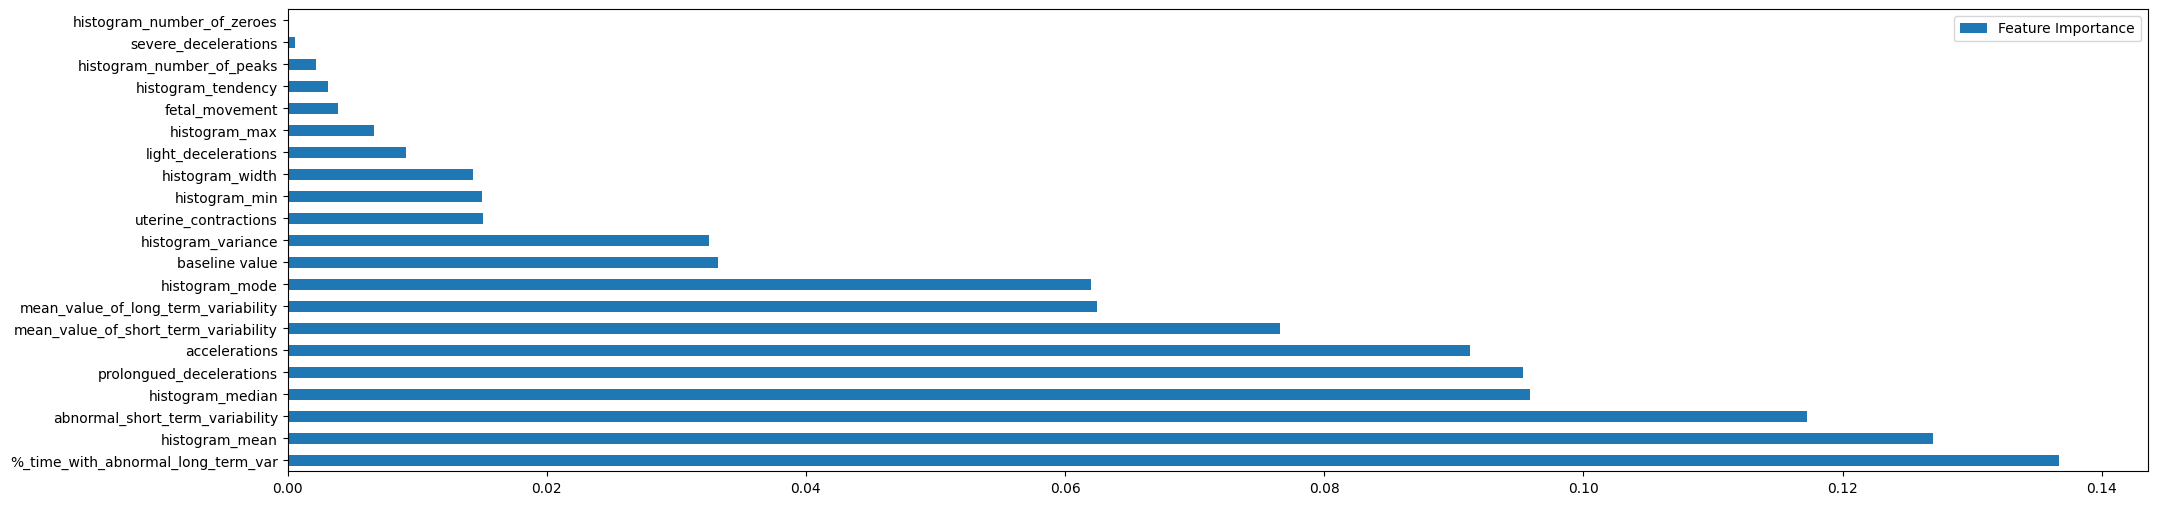

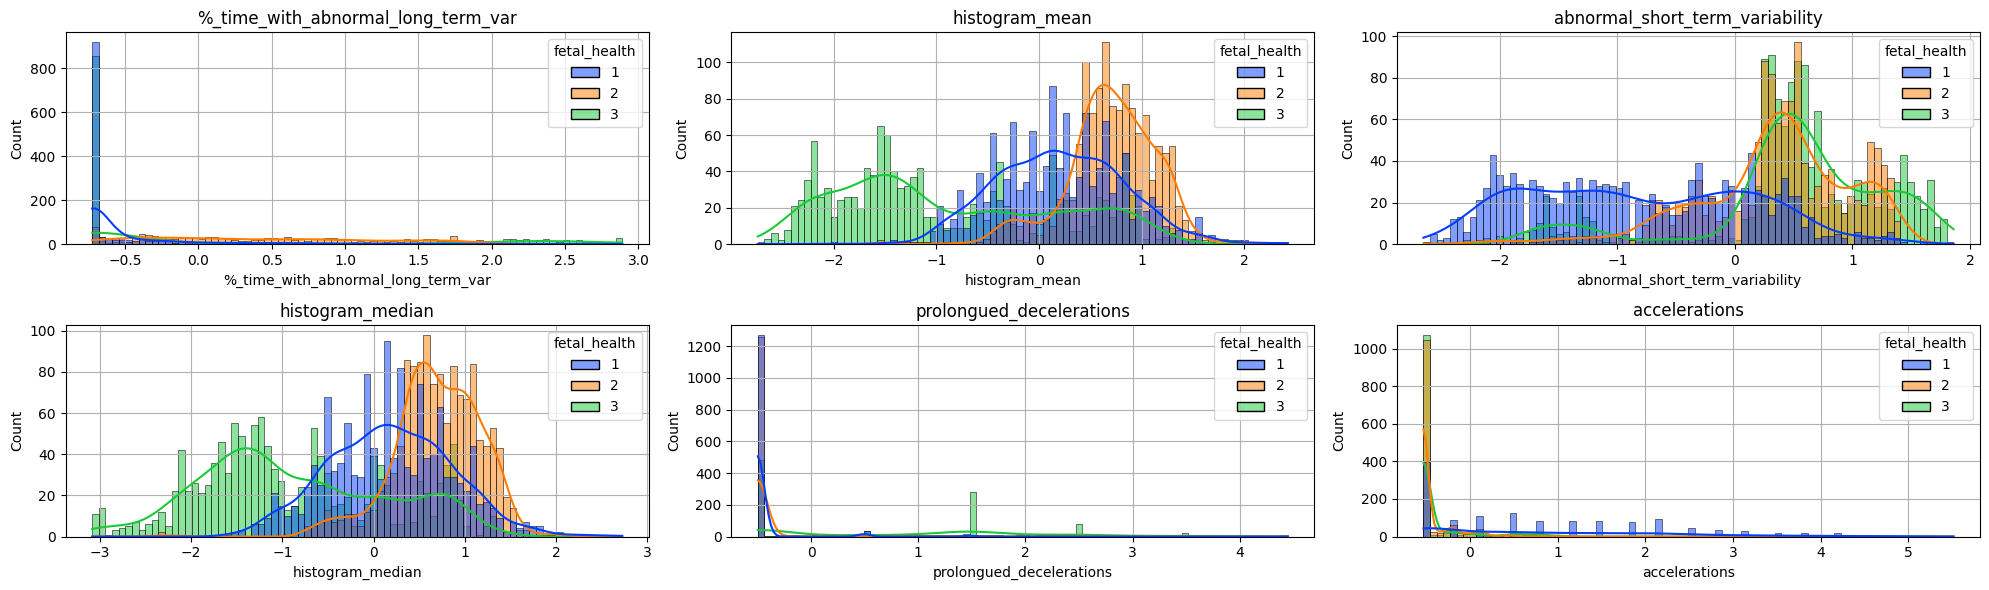

In [56]:
#rfc = RandomForestClassifier(random_state=42,n_jobs=-1)#n_estimators=100
#rfc.fit(Xs_train_scaled,ys_train)

feature_importances = pd.DataFrame(rfc_search.best_estimator_.feature_importances_ , index=rfc_search.best_estimator_.feature_names_in_,
                                  columns=['Feature Importance'])
feature_importances = feature_importances.sort_values(by='Feature Importance', ascending=False)

feature_importances.plot(kind='barh',figsize=(24,6))

fig,ax=plt.subplots(2,3,figsize=(20,6))
ax=ax.ravel()
for i, col in enumerate(feature_importances.index[0:6]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()

plt.tight_layout()

## KNN

### Validation and HyperParameter Optimization

In [76]:
#introduco metodi di validazione
stkfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
kfold = KFold(n_splits=10, shuffle=True,random_state=42)
fold=[kfold,stkfold,10]

# raccolgo le coppie di dati su cui eseguire la validazione : dati originali - dati bilanciati con SMOTE- dati scalati e bilanciati
data=[[X_train,y_train],[X_train_onlyscaled,y_train],[Xs_train,ys_train],[Xs_train_scaled,ys_train]]

acc=np.array([])
# per le tre coppie di dati eseguo due differenti metodi di validazione kfold e StratifiedKfold. L'ultimo è solitamente usato nel caso di dati sbilanciati  
for n_fold,f in enumerate(fold):
    for k in [3,5,7,9,11,13,15]:
        #carico  il modello per n=k
        knn = KNeighborsClassifier(n_neighbors=k)
        for x in data:
            acc=np.append(acc,round(cross_val_score(knn, x[0],x[1] , cv=f, scoring='f1_micro',n_jobs=-1).mean(),4))
        acc=np.append(acc,[n_fold,k])

acc=acc.reshape(21,6)
acc_knn=pd.DataFrame(columns=['KNN','KNN Scaled','KNN Smote','KNN Smote+Scaled','Validation','Num Neighbors'],data=acc)
dict={0.0:'Kfold',1.0:'StkFold',2.0:'cv=10'}
acc_knn=acc_knn.replace({'Validation':dict})
acc_knn['Num Neighbors']=acc_knn['Num Neighbors'].astype(int)
acc_knn_pt=acc_knn.pivot_table(index=['Validation','Num Neighbors'])

acc_knn_pt

KNN  KNN Scaled  KNN Smote  KNN Smote+Scaled
Validation Num Neighbors                                                 
Kfold      3              0.8994      0.9041     0.9503            0.9622
           5              0.8941      0.8947     0.9453            0.9521
           7              0.8918      0.8906     0.9390            0.9463
           9              0.8865      0.8941     0.9284            0.9380
           11             0.8788      0.8982     0.9211            0.9342
           13             0.8759      0.8871     0.9155            0.9314
           15             0.8694      0.8847     0.9085            0.9254
StkFold    3              0.9041      0.9006     0.9483            0.9624
           5              0.8965      0.8924     0.9425            0.9513
           7              0.8918      0.8959     0.9385            0.9433
           9              0.8876      0.8929     0.9276            0.9392
           11             0.8812      0.8941     0.9211            0.9339
           13             0.8741      0.8906     0.9176            0.9276
           15             0.8735      0.8847     0.9118            0.9254
cv=10      3              0.8988      0.9029     0.9511            0.9642
           5              0.8935      0.8988     0.9443            0.9549
           7              0.8865      0.8947     0.9387            0.9466
           9              0.8847      0.8876     0.9299            0.9395
           11             0.8765      0.8906     0.9234            0.9352
           13             0.8765      0.8900     0.9173            0.9292
           15             0.8706      0.8859     0.9110            0.9259

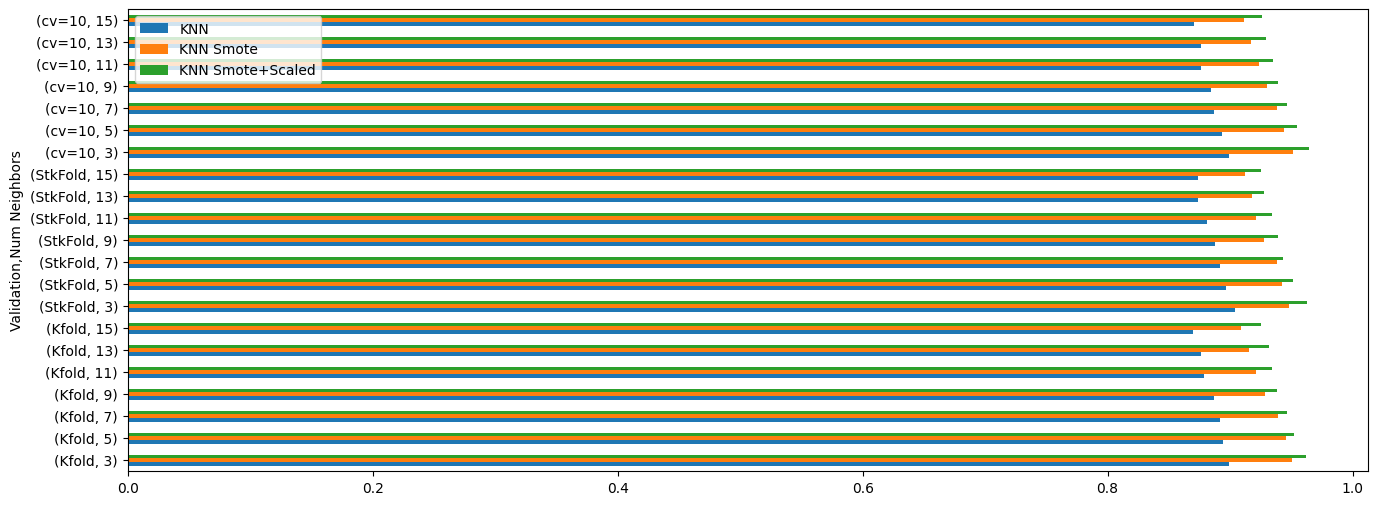

In [58]:
acc_knn_pt.plot(kind='barh',figsize=(16,6))
plt.legend(loc='upper left')

The greatest accuracy is reached for K=3 with scaled and balanced values ​​both with the Kfold method and with StratifiedKFold. In this case the balance turns out to be very advantageous, from 0.89 to 0.95, even more if associated with the scaling of the data with a maximum value of 0.96. The gain is 0.7% of the normal data

### Prediction

In [107]:
# valuto il modello con l'iperparametro migliore k=3
knn = KNeighborsClassifier(n_neighbors=3)

#fit su dati bilanciati e scalati
knn.fit(Xs_train_scaled,ys_train)

#predizione sul train dei dati bilanciati e scalati
y_train_pred_knn=knn.predict(Xs_train_scaled)

#predizione sul test dei dati scalati
y_test_pred_knn=knn.predict(X_test_scaled)

#misuro l'accuratezza rispetto a train (bilanciato) e test
acc_train=accuracy_score(ys_train,y_train_pred_knn)
acc_test=accuracy_score(y_test,y_test_pred_knn)

#calcolo metriche
precision, recall, f_score, support = precision_recall_fscore_support(y_test,y_test_pred_knn,average='weighted')
acc_train=round(acc_train,3)
acc_test=round(acc_test,3)
precision=round(precision,3)
recall=round(recall,3)
f_score=round(f_score,3)

print()
print('Accuracy train: {}'.format(acc_train))
print('Accuracy test: {}'.format(acc_test))
print('Precision test: {}'.format(precision))
print('Recall test: {}'.format(recall))
print('F-score: {}'.format(f_score))
print()
print(classification_report(y_test,y_test_pred_knn))

# aggiorno i dati nel dataframe
dati={
    'Accuracy':acc_test,
    'Precision':precision,
    'Recall':recall,
    'F-score':f_score,
    'Cross Validation':'STK-Fold',
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['K-Neighbors Classifier',:]=dati
df_acc_pred



Accuracy train: 0.984

Accuracy test: 0.904

Precision test: 0.918

Recall test: 0.904

F-score: 0.908



              precision    recall  f1-score   support



           1       0.98      0.92      0.95       333

           2       0.66      0.84      0.74        64

           3       0.81      0.86      0.83        29



    accuracy                           0.90       426

   macro avg       0.81      0.87      0.84       426

weighted avg       0.92      0.90      0.91       426




Accuracy Precision Recall F-score Validation  \
Logistic Regression        0.84     0.883   0.84   0.854   STK-Fold   
Decision Tree             0.932      0.94  0.932   0.934      CV=10   
Random Forest             0.869     0.903  0.869   0.878     K-Fold   
K-Neighbors Classifier    0.904     0.918  0.904   0.908        NaN   

                                Data  
Logistic Regression     Smote+Scaled  
Decision Tree           Smote+Scaled  
Random Forest           Smote+Scaled  
K-Neighbors Classifier  Smote+Scaled

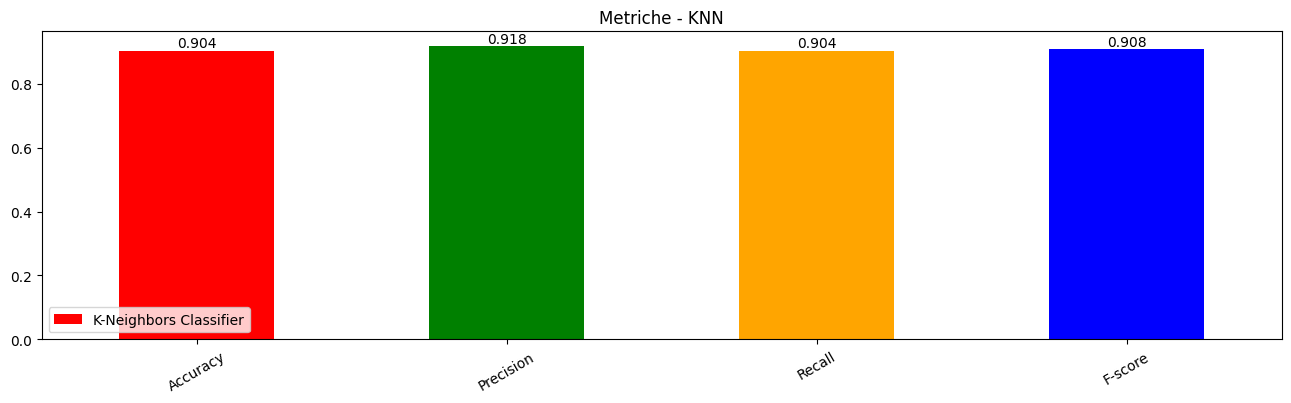

In [60]:
g=df_acc_pred.loc['K-Neighbors Classifier'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche - KNN')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

### Confusion Matrix

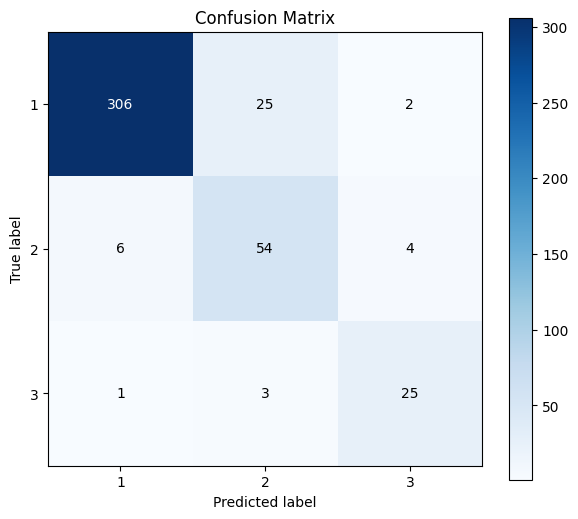

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_knn, normalize=False, figsize=(7,6))
plt.show()

KNN predicts 306 correct records for class 1 (normal) with 27 errors, 54 with class 2 (suspect) with 10 errors, 25 with class 3 (pathological) with 4 errors

## XGBoost Classifier

### Validation

In [82]:
#faccio un label encoder perchè XGBoost si aspetta un label del tipo [0,1,2]
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y_train_enc=enc.fit_transform(y_train)
ys_train_enc=enc.fit_transform(ys_train)
y_test_enc=enc.fit_transform(y_test)

#Definisco il modello
xgb = XGBClassifier()
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

#introduco metodi di validazione
stkfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
kfold = KFold(n_splits=10, shuffle=True,random_state=42)
fold=[kfold,stkfold,10]

# raccolgo le coppie di dati su cui eseguire la validazione : dati originali - dati bilanciati con SMOTE- dati scalati e bilanciati
data=[[X_train,y_train_enc],[X_train_onlyscaled,y_train_enc],[Xs_train,ys_train_enc],[Xs_train_scaled,ys_train_enc]]

acc=np.array([])
# per le tre coppie di dati eseguo due differenti metodi di validazione kfold e StratifiedKfold. L'ultimo è solitamente usato nel caso di dati sbilanciati  
for n_fold,f in enumerate(fold):
        for x in data:
            acc=np.append(acc,round(cross_val_score(xgb, x[0],x[1] , cv=f, scoring='f1_micro',n_jobs=-1).mean(),4))
        acc=np.append(acc,n_fold)

acc=acc.reshape(3,5)
acc_xgb_val=pd.DataFrame(columns=['XGB','XGB scaled','XGB smote','XGB smote+scaled'],index=['K-Fold','STK-Fold','cv=10'],data=acc[:,:-1])

acc_xgb_val

XGBClassifier(base_score=None, booster=None, callbacks=None,

              colsample_bylevel=None, colsample_bynode=None,

              colsample_bytree=None, early_stopping_rounds=None,

              enable_categorical=False, eval_metric=None, feature_types=None,

              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,

              interaction_constraints=None, learning_rate=None, max_bin=None,

              max_cat_threshold=None, max_cat_to_onehot=None,

              max_delta_step=None, max_depth=None, max_leaves=None,

              min_child_weight=None, missing=nan, monotone_constraints=None,

              n_estimators=100, n_jobs=None, num_parallel_tree=None,

              predictor=None, random_state=None, ...)


XGB  XGB scaled  XGB smote  XGB smote+scaled
K-Fold    0.9476      0.9476     0.9821            0.9821
STK-Fold  0.9506      0.9506     0.9806            0.9806
cv=10     0.9424      0.9424     0.9814            0.9814

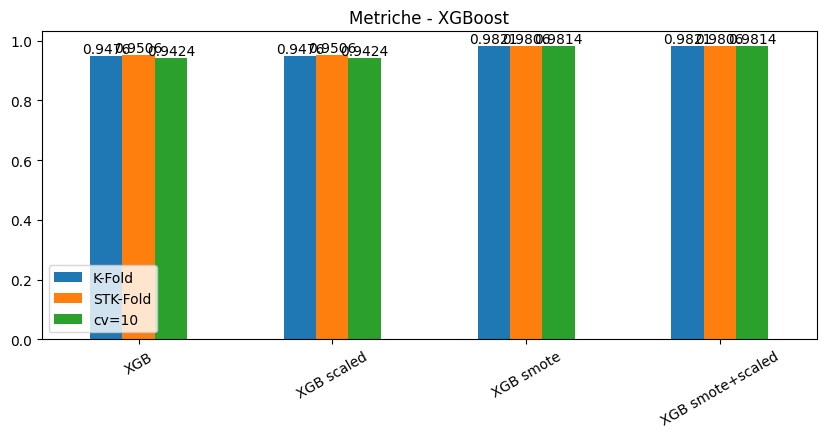

In [83]:
g=acc_xgb_val.T.plot(kind='bar',figsize=(10,4))
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.set_title('Metriche - XGBoost')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

Even with the XGBoost method, the performance difference due to the balancing is noticeable. The parameters will be optimized with a K-Fold validation and with scaled and balanced datasets

### HyperParameter Optimization

In [84]:
# parametri 
xgb_params={
    'max_depth':range(2,10,1),
    'learning_rate': [0.1,0.01,0.05],
    'n_estimators':[50,100,150,200]}

In [85]:
#definisco i parametri del modello di ricerca
xgb_search = GridSearchCV(estimator= xgb, param_grid=xgb_params, cv=kfold, scoring='accuracy', verbose=1 , n_jobs=-1)

In [86]:
# trovo gli ipermarametri sul set di dati train
xgb_search.fit(Xs_train_scaled, ys_train_enc)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     in...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [87]:
print('Best Params:',xgb_search.best_params_)
print('Best Estimators:',xgb_search.best_estimator_)
print('Best Score:',xgb_search.best_score_)

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Best Estimators: XGBClassifier(base_score=None, booster=None, callbacks=None,

              colsample_bylevel=None, colsample_bynode=None,

              colsample_bytree=None, early_stopping_rounds=None,

              enable_categorical=False, eval_metric=None, feature_types=None,

              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,

              interaction_constraints=None, learning_rate=0.1, max_bin=None,

              max_cat_threshold=None, max_cat_to_onehot=None,

              max_delta_step=None, max_depth=5, max_leaves=None,

              min_child_weight=None, missing=nan, monotone_constraints=None,

              n_estimators=200, n_jobs=None, num_parallel_tree=None,

              objective='multi:softprob', predictor=None, ...)

Best Score: 0.9828581787649797


### Prediction

In [108]:
# faccio la predizione sul train
y_train_pred_xgb=xgb_search.best_estimator_.predict(Xs_train_scaled)
# predizione del test 
y_test_pred_xgb=xgb_search.best_estimator_.predict(X_test_scaled)

#misuro l'accuratezza rispetto a y_train
acc_train=accuracy_score(ys_train_enc,y_train_pred_xgb)
acc_test=accuracy_score(y_test_enc,y_test_pred_xgb)

precision, recall, f_score, support = precision_recall_fscore_support(y_test_enc,y_test_pred_xgb,average='weighted')
acc_train=round(acc_train,3)
acc_test=round(acc_test,3)
precision=round(precision,3)
recall=round(recall,3)
f_score=round(f_score,3)

print()
print('Accuracy train: {}'.format(acc_train))
print('Accuracy test: {}'.format(acc_test))
print('Precision test: {}'.format(precision))
print('Recall test: {}'.format(recall))
print('F-score: {}'.format(f_score))
print()
print(classification_report(y_test_enc,y_test_pred_xgb))

dati={
    'Accuracy':acc_test,
    'Precision':precision,
    'Recall':recall,
    'F-score':f_score,
    'Validation':'K-Fold',
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['XGBoost',:]=dati
df_acc_pred



Accuracy train: 1.0

Accuracy test: 0.962

Precision test: 0.963

Recall test: 0.962

F-score: 0.963



              precision    recall  f1-score   support



           0       0.98      0.97      0.98       333

           1       0.88      0.89      0.88        64

           2       0.97      1.00      0.98        29



    accuracy                           0.96       426

   macro avg       0.94      0.95      0.95       426

weighted avg       0.96      0.96      0.96       426




Accuracy Precision Recall F-score Validation  \
Logistic Regression        0.84     0.883   0.84   0.854   STK-Fold   
Decision Tree             0.932      0.94  0.932   0.934      CV=10   
Random Forest             0.869     0.903  0.869   0.878     K-Fold   
K-Neighbors Classifier    0.904     0.918  0.904   0.908        NaN   
XGBoost                   0.962     0.963  0.962   0.963     K-Fold   

                                Data  
Logistic Regression     Smote+Scaled  
Decision Tree           Smote+Scaled  
Random Forest           Smote+Scaled  
K-Neighbors Classifier  Smote+Scaled  
XGBoost                 Smote+Scaled

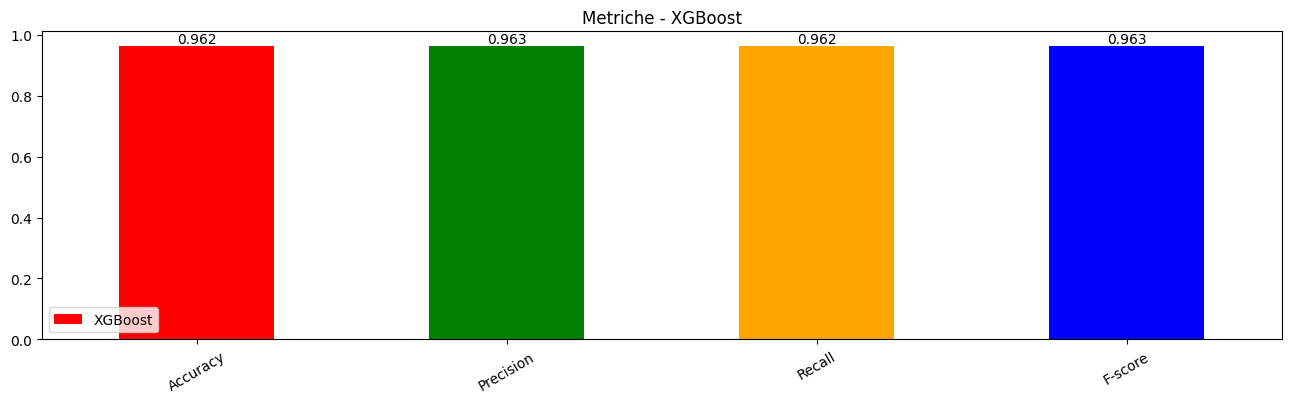

In [69]:
g=df_acc_pred.loc['XGBoost'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche - XGBoost')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

### Confusion Matrix

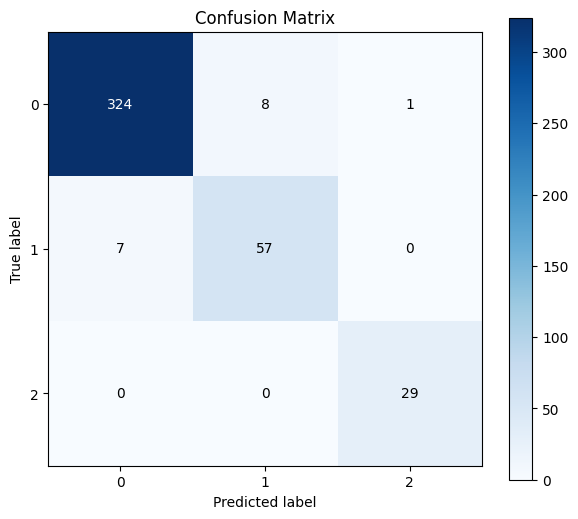

In [70]:
skplt.metrics.plot_confusion_matrix(y_test_enc, y_test_pred_xgb, normalize=False, figsize=(7,6))
plt.show()

XGBoost predicts 324 correct records for class 1 (normal) with 9 errors, 57 with class 2 (suspect) with errors 7, 29 with class 3 (pathological) this time without any errors. With these results, XGBoost is undoubtedly the best of the tested models

### Feature Importance

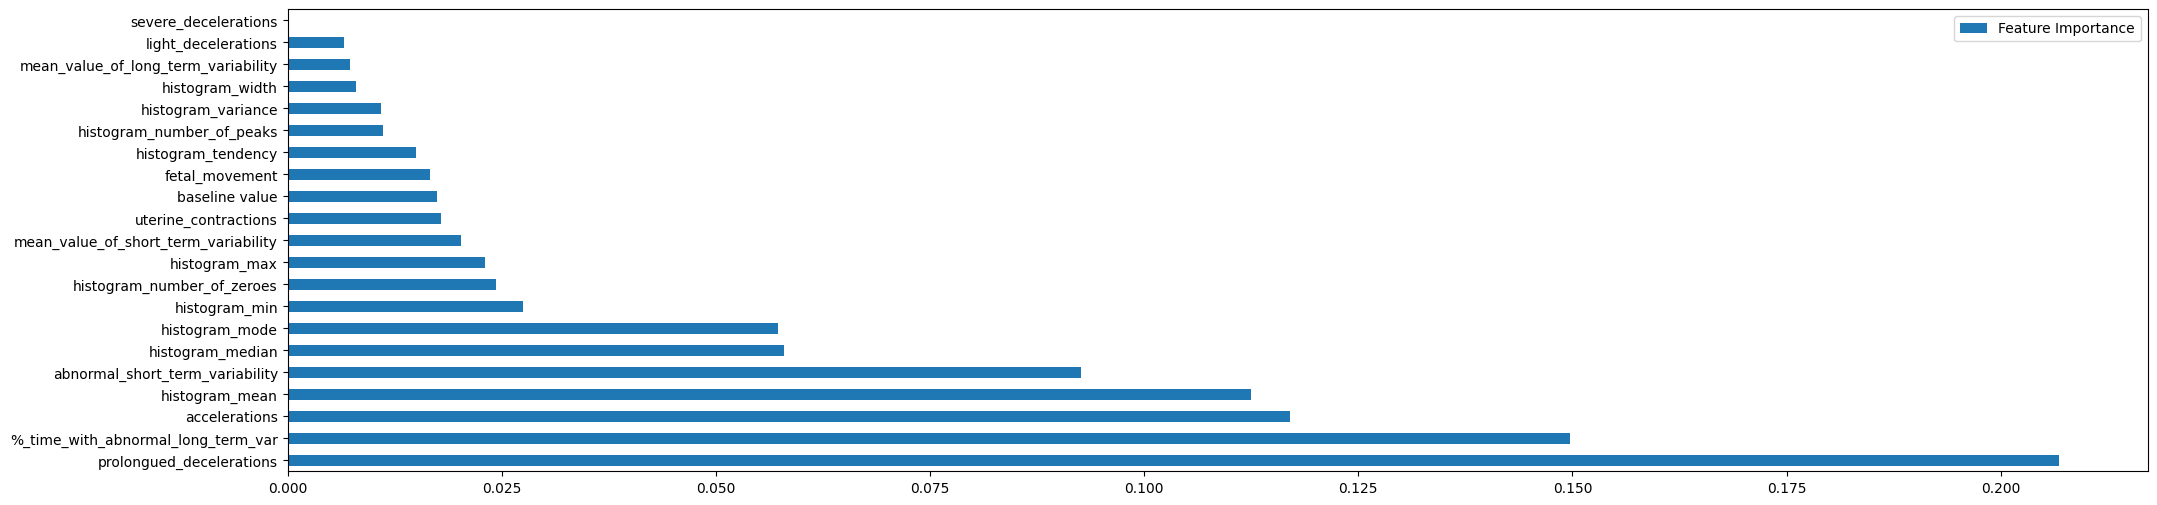

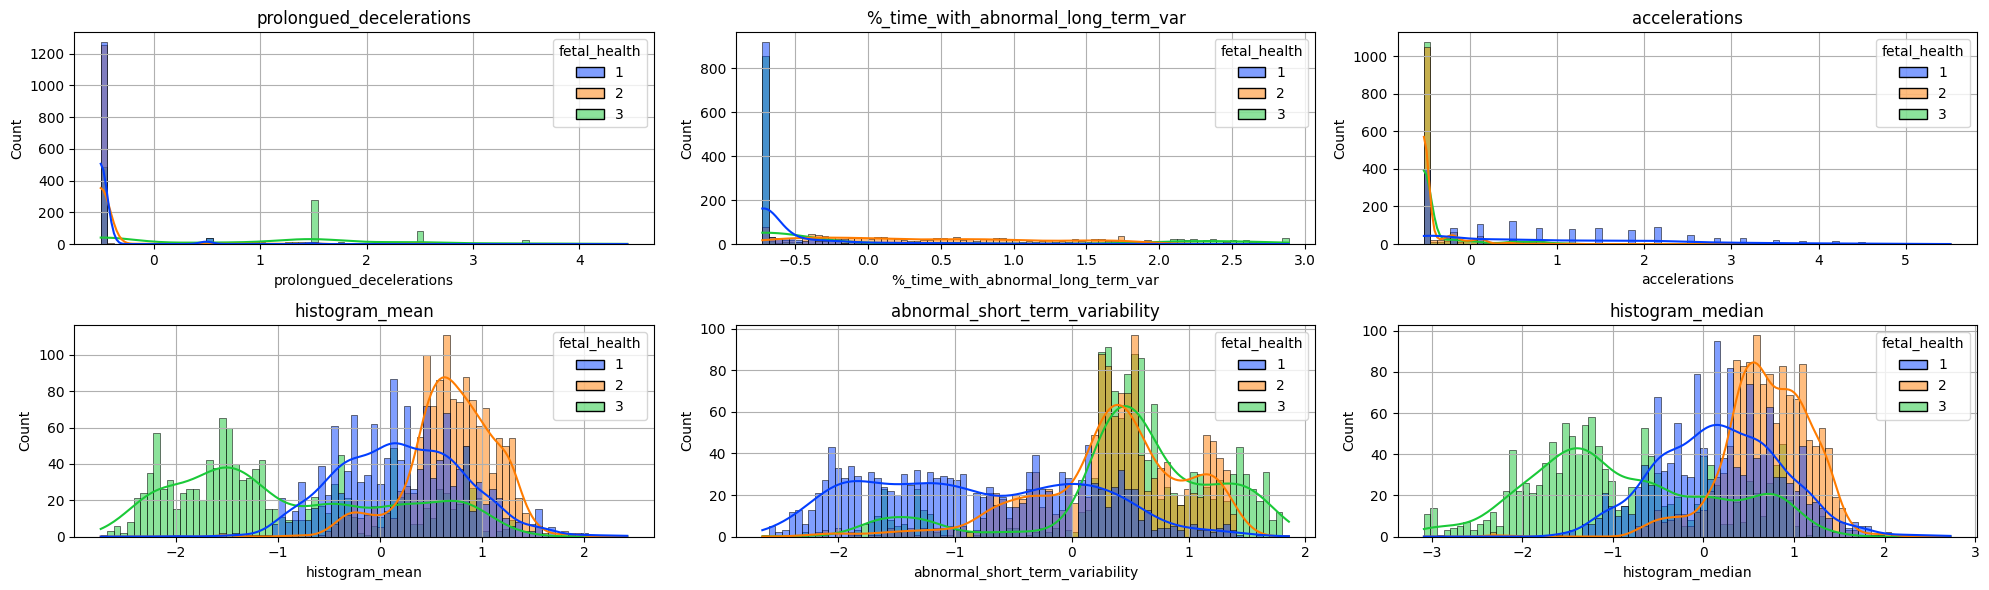

In [71]:
feature_importances = pd.DataFrame(xgb_search.best_estimator_.feature_importances_ , index=xgb_search.best_estimator_.feature_names_in_,
                                  columns=['Feature Importance'])
feature_importances = feature_importances.sort_values(by='Feature Importance', ascending=False)

feature_importances.plot(kind='barh',figsize=(24,6))

fig,ax=plt.subplots(2,3,figsize=(20,6))
ax=ax.ravel()
for i, col in enumerate(feature_importances.index[0:6]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()

plt.tight_layout()

# Conclusions

We can say that the XGBoost method is definitely the best performing of all the models tested.

Except for the logistic regression, the SMOTE balancing technique definitely outperformed the unbalanced data alone.

In [109]:
df_acc_pred

Accuracy Precision Recall F-score Validation  \
Logistic Regression        0.84     0.883   0.84   0.854   STK-Fold   
Decision Tree             0.932      0.94  0.932   0.934      CV=10   
Random Forest             0.869     0.903  0.869   0.878     K-Fold   
K-Neighbors Classifier    0.904     0.918  0.904   0.908        NaN   
XGBoost                   0.962     0.963  0.962   0.963     K-Fold   

                                Data  
Logistic Regression     Smote+Scaled  
Decision Tree           Smote+Scaled  
Random Forest           Smote+Scaled  
K-Neighbors Classifier  Smote+Scaled  
XGBoost                 Smote+Scaled

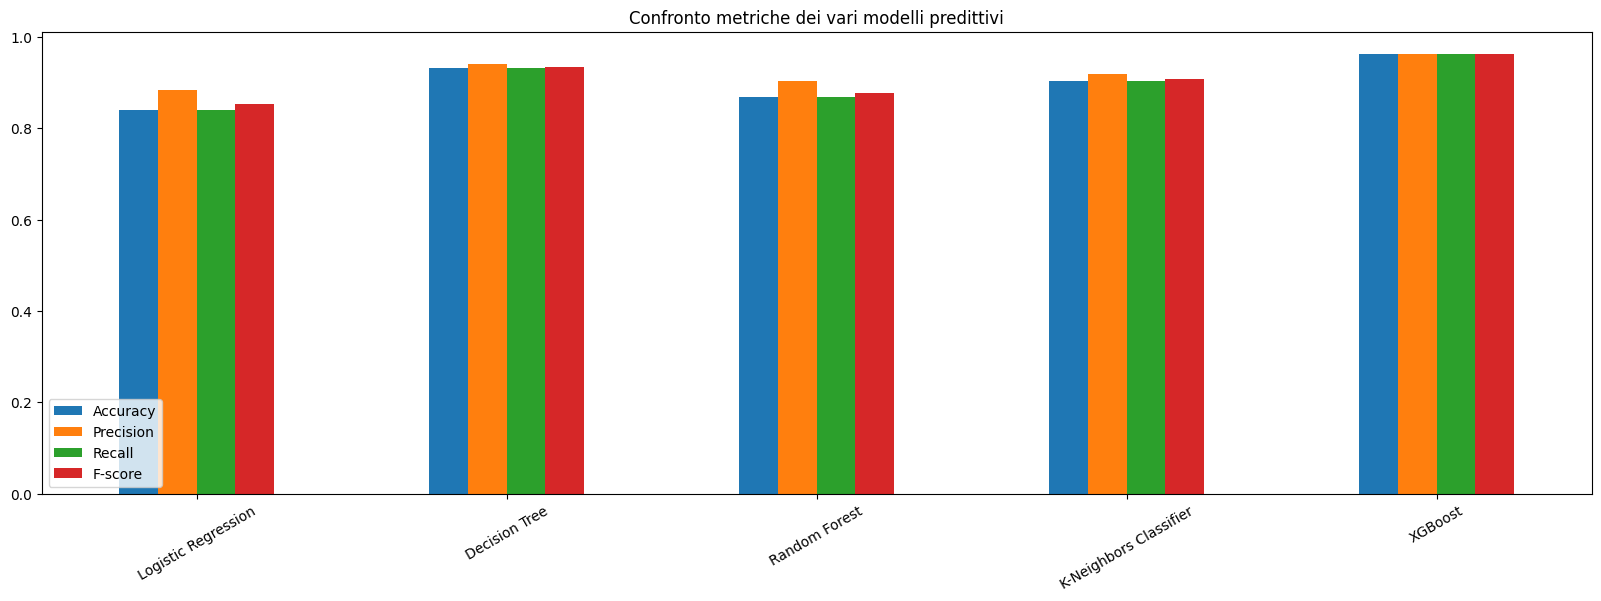

In [73]:
df_acc_pred.plot(kind='bar',figsize=(20,6))
plt.legend(loc='lower left')
plt.title('Confronto metriche dei vari modelli predittivi')
plt.xticks(rotation = 30);

Below are the metrics obtained for the XGBoost case:

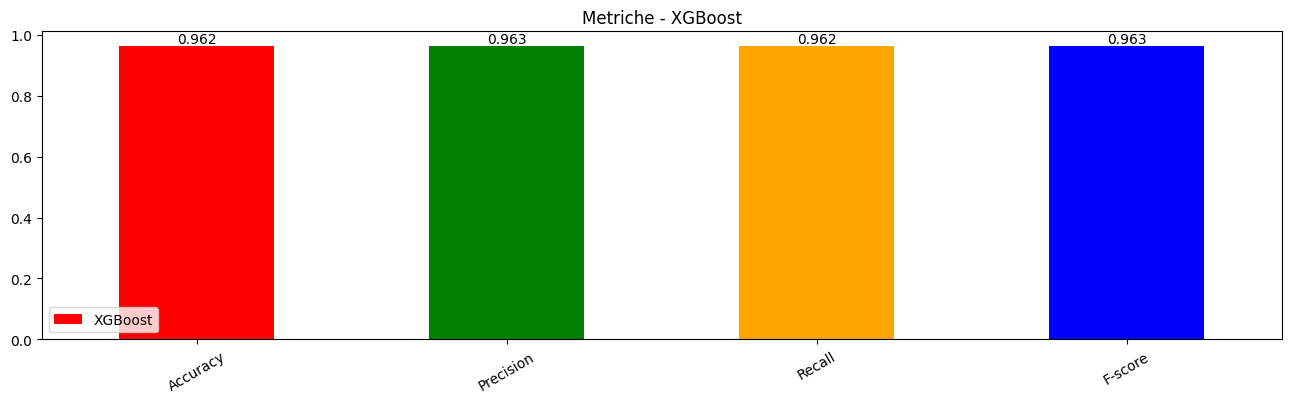

In [75]:
g=df_acc_pred.loc['XGBoost'][:-2].plot(kind='bar',figsize=(16,4),color=['red','green','orange','blue'])
g.bar_label(g.containers[0],label_type='edge')
g.set_title('Metriche - XGBoost')
plt.legend(loc='lower left')
plt.xticks(rotation = 30);

In [74]:
print(classification_report(y_test_enc,y_test_pred_xgb))

              precision    recall  f1-score   support



           0       0.98      0.97      0.98       333

           1       0.88      0.89      0.88        64

           2       0.97      1.00      0.98        29



    accuracy                           0.96       426

   macro avg       0.94      0.95      0.95       426

weighted avg       0.96      0.96      0.96       426




One of the metrics of interest is certainly the RECALL which consists in minimizing false negatives. In fact, we would like to prevent pathological cases from being mistakenly considered suspicious or even worse normal. By maximizing the Recall, with a good method like XGBoost, we try to minimize the possibility of error in detecting the pathology.

Unfortunately, recall is a little less accurate in detecting suspicious cases. You could try other techniques to optimize the computation such as Ensamble methods which are not covered in this notebook.

The other useful metric could be the F1-score, since compared to recall, in addition to being sensitive to false negatives, it guarantees more precision than false positives. In fact, we must also consider the consequences that a truly normal case is classified as pathological. The actions induced on a fetus, actually normal, could be invasive and generate a problem where instead there is no trace.   

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

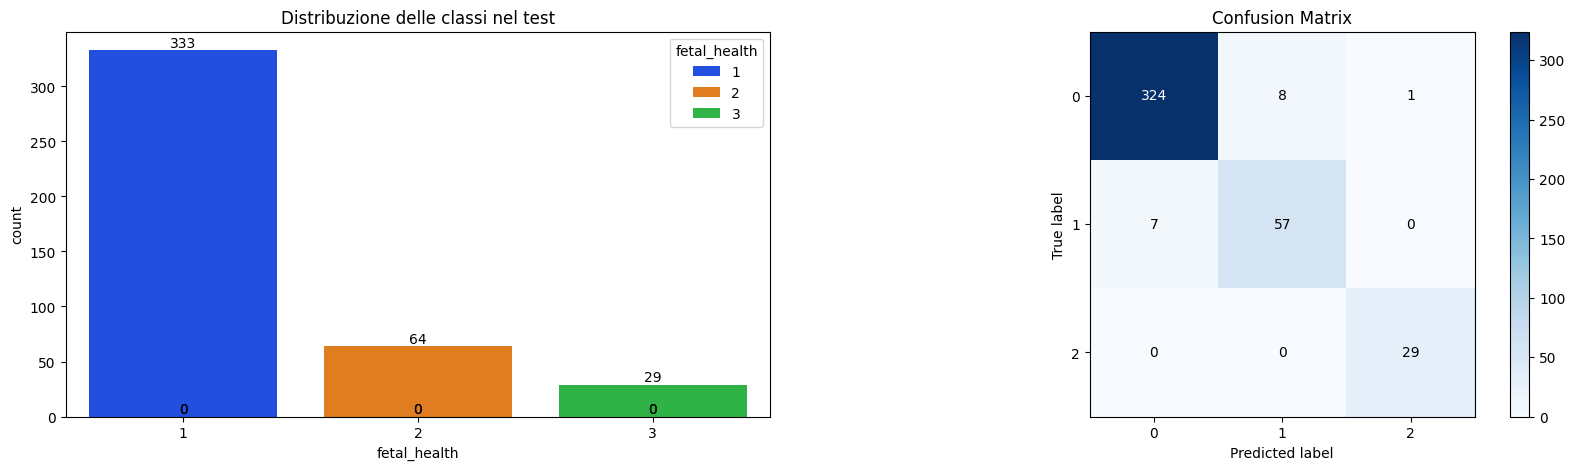

In [111]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

g2=sns.countplot(data=df_test,x='fetal_health',hue='fetal_health',palette='bright',dodge=False,ax=ax[0])
g2.bar_label(g2.containers[0]);
g2.bar_label(g2.containers[1]);
g2.bar_label(g2.containers[2]);
ax[0].set_title('Distribuzione delle classi nel test')
skplt.metrics.plot_confusion_matrix(y_test_enc, y_test_pred_xgb, normalize=False, figsize=(7,6),ax=ax[1])

The feature importance that entered the top 6 of the models tested are summarized below:



## Top 9 feature importance

In [77]:
data=np.array(['x','','x','x','x','x','x','x','','x','x','x','','x','x','x','x','x','x','x','','x','x','x','x','','','','x','','','','x','x','','']).reshape(9,4)
summary_feature=pd.DataFrame(index=[['Accelerations','Prolongued Decelerations','Perc Time with abnormal long term variability','Histogram Mean','Abnormal short term variability','Histogram Median','Histogram Variance','Histogram Mode','Mean value of short term variability']],columns=['Logistic Regression','Decision Tree','Random Forest','XGBoost'],data=data)
summary_feature

Logistic Regression  \
Accelerations                                                   x   
Prolongued Decelerations                                        x   
Perc Time with abnormal long term variability                       
Histogram Mean                                                      
Abnormal short term variability                                 x   
Histogram Median                                                    
Histogram Variance                                              x   
Histogram Mode                                                  x   
Mean value of short term variability                            x   

                                              Decision Tree Random Forest  \
Accelerations                                                           x   
Prolongued Decelerations                                  x             x   
Perc Time with abnormal long term variability             x             x   
Histogram Mean                                            x             x   
Abnormal short term variability                           x             x   
Histogram Median                                          x             x   
Histogram Variance                                                          
Histogram Mode                                                              
Mean value of short term variability                      x                 

                                              XGBoost  
Accelerations                                       x  
Prolongued Decelerations                            x  
Perc Time with abnormal long term variability       x  
Histogram Mean                                      x  
Abnormal short term variability                     x  
Histogram Median                                    x  
Histogram Variance                                     
Histogram Mode                                         
Mean value of short term variability

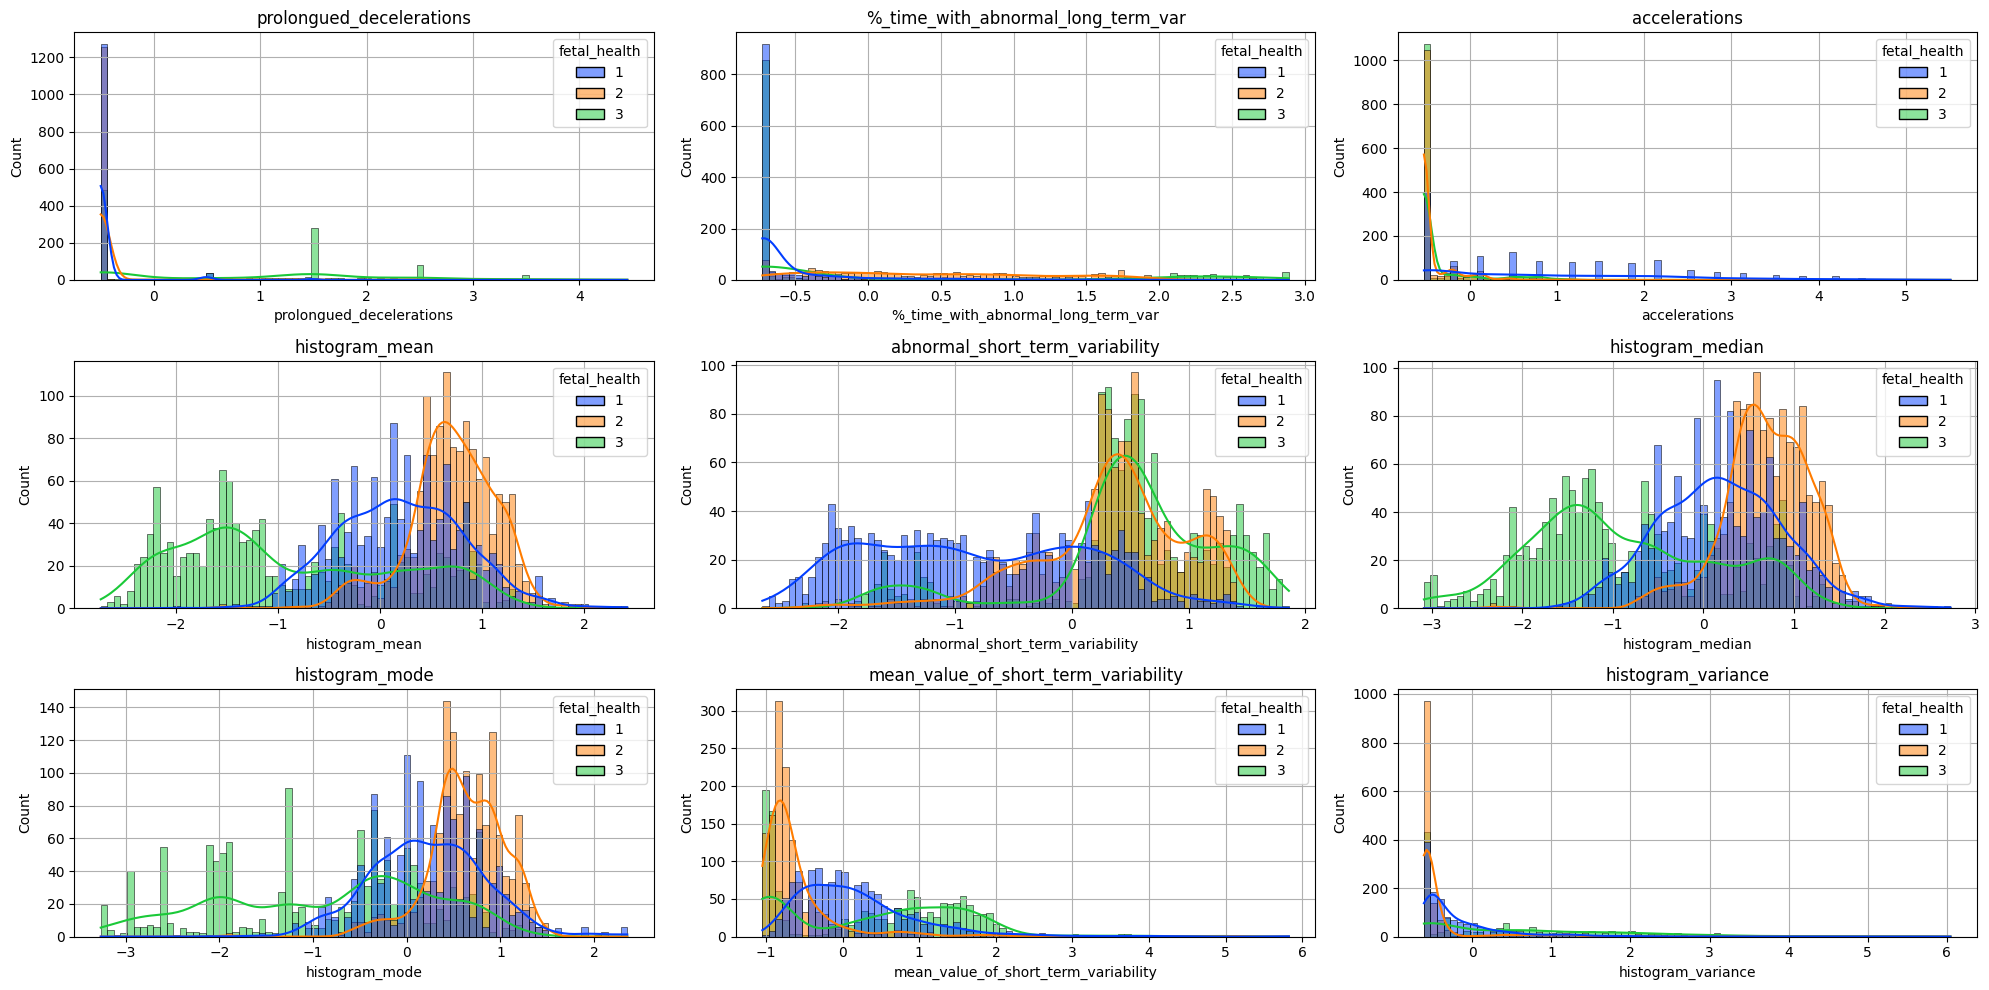

In [78]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
ax=ax.ravel()
for i, col in enumerate(feature_importances.index[0:7]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()

for i, col in enumerate(feature_importances.index[[10,16]]):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i+7],palette='bright')
    ax[i+7].set_title(col)
    ax[i+7].grid()

plt.tight_layout()